# 卒論研究１

## モジュールの読み込み

In [52]:
#
# 必要なモジュールの読み込み
#

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.svar_model import SVAR

from graphviz import Digraph

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ

In [53]:
import japanize_matplotlib

In [54]:
import datetime

In [55]:
import calendar

In [56]:
import seaborn as sns

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [58]:
import random

## 原系列

### データの加工

In [59]:
# def tomonthly_mean(file):
#     """日次データのファイルを読み込んでシリアル値をdatetime型に変換し、月の平均を取って月次データに変換"""

#     df_alt = pd.read_csv(file)
#     df_alt['Date']=pd.to_timedelta(df_alt.iloc[:,0],unit='D')+pd.to_datetime("1899/12/30")
#     df_alt.set_index('Date', drop = True, inplace = True)
#     df_alt = df_alt.iloc[:, 1:]
#     df_alt = df_alt.resample('M').mean()
    
#     return df_alt

In [60]:
def tomonthly_last(file):
    
    """日次データのファイルを読み込んでdatetime型に変換し、2003年8月～2023年7月の月の最後の値を取って月次データに変換
        変数は1列のみ！"""
    
    df_alt = pd.read_csv(file)
    df_alt['Date'] = pd.to_datetime(df_alt['Date'])
    
    L1 = list(range(2003, 2024))
    L2 = list(range(1, 13))
    
    cal = []

    for l in L1:
        for m in L2:
            n = datetime.datetime(l, m, calendar.monthrange(l, m)[1])
            cal.append(n)

    cal = cal[7:-5]
    
    L = []

    for l in L1:
        for m in L2:
            n = datetime.datetime(l, m, 1)
            L.append(n)
            
    L_former = L[7:-5]
    L_latter = L[8:-4]
    
    D = []
    
    for f, l in zip(L_former,L_latter):
        cond = ((df_alt['Date'] >= f) & (df_alt['Date'] < l))
        df_sub = df_alt.loc[cond,:]
        x = df_sub.iloc[-1,1]
        D.append(x)
        
    df = pd.DataFrame({df_alt.columns.values[0]:cal, df_alt.columns.values[1]:D})
    df.set_index(df_alt.columns.values[0], inplace = True)
    
    return df

In [61]:
tomonthly_last('卒論データ(JGB).csv')

,JGB
Date,
2003-08-31,1.432
2003-09-30,1.398
2003-10-31,1.463
2003-11-30,1.315
2003-12-31,1.363
...,...
2023-03-31,0.389
2023-04-30,0.403
2023-05-31,0.448


In [62]:
def monthly(file):
    """月次データのファイルを読み込み"""
    
    df = pd.read_csv('卒論データ(月次).csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace = True)
    
    return df

In [63]:
df_monthly = monthly('卒論データ(月次).csv')
df_monthly

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JPU
Date,,,,,,,,,,,,
2003-08-31,1008.88,10399.53027,1008.01,1423.35,2557.53,383.0,31.28,95.6,110.9,107.7,117.05,68.069990
2003-09-30,1019.58,10232.57031,995.97,1366.20,2396.69,385.9,29.15,95.7,114.1,109.7,111.20,88.881077
2003-10-31,1055.32,10693.66016,1050.71,1346.48,2575.90,398.0,29.13,95.7,116.1,112.3,108.76,98.707670
2003-11-30,990.80,10006.12988,1058.20,1398.71,2631.57,398.9,30.26,95.2,115.7,111.2,109.50,83.109660
2003-12-31,1055.08,10787.83008,1111.92,1492.72,2760.84,426.3,32.40,95.3,115.6,113.5,107.10,67.138181
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,2015.05,28203.34961,4109.31,3277.34,4312.99,2007.5,80.27,104.4,104.8,114.2,133.48,126.677042
2023-04-30,2070.37,29058.05078,4169.48,3306.48,4353.41,2019.1,76.13,105.1,105.5,114.4,134.05,141.883664
2023-05-31,2130.77,30886.00977,4179.83,3196.15,4222.56,1981.3,67.60,105.1,103.2,114.7,139.80,146.413234


In [64]:
df = pd.merge(df_monthly, tomonthly_last('卒論データ(JGB).csv'), how = 'inner', on = 'Date')
df#.to_csv("df.csv")

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JPU,JGB
Date,,,,,,,,,,,,,
2003-08-31,1008.88,10399.53027,1008.01,1423.35,2557.53,383.0,31.28,95.6,110.9,107.7,117.05,68.069990,1.432
2003-09-30,1019.58,10232.57031,995.97,1366.20,2396.69,385.9,29.15,95.7,114.1,109.7,111.20,88.881077,1.398
2003-10-31,1055.32,10693.66016,1050.71,1346.48,2575.90,398.0,29.13,95.7,116.1,112.3,108.76,98.707670,1.463
2003-11-30,990.80,10006.12988,1058.20,1398.71,2631.57,398.9,30.26,95.2,115.7,111.2,109.50,83.109660,1.315
2003-12-31,1055.08,10787.83008,1111.92,1492.72,2760.84,426.3,32.40,95.3,115.6,113.5,107.10,67.138181,1.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,2015.05,28203.34961,4109.31,3277.34,4312.99,2007.5,80.27,104.4,104.8,114.2,133.48,126.677042,0.389
2023-04-30,2070.37,29058.05078,4169.48,3306.48,4353.41,2019.1,76.13,105.1,105.5,114.4,134.05,141.883664,0.403
2023-05-31,2130.77,30886.00977,4179.83,3196.15,4222.56,1981.3,67.60,105.1,103.2,114.7,139.80,146.413234,0.448


### 基本統計量

In [65]:
df.shape

(240, 13)

In [66]:
df.describe()#.to_csv("基本統計量(df).csv")

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JPU,JGB
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,1382.647333,16871.334583,2073.333583,2723.438708,3258.436417,1214.569583,69.395458,97.381250,112.422083,113.935417,106.864042,107.022843,0.749658
std,386.444686,6333.960761,1047.131610,861.108086,572.155304,458.820364,22.909518,2.637345,8.637147,8.693043,14.386065,32.901226,0.639994
min,712.180000,7454.279785,735.090000,1059.610000,1963.790000,378.000000,19.040000,94.000000,86.200000,83.700000,76.360000,47.431749,-0.275000
25%,1075.045000,11067.189697,1256.525000,2132.942500,2810.302500,890.625000,50.885000,95.200000,107.700000,110.000000,99.792500,83.515845,0.085750
50%,1413.245000,16303.834960,1657.260000,2856.770000,3236.845000,1257.150000,67.040000,96.300000,111.950000,116.100000,108.975000,105.142368,0.683000
75%,1669.505000,21492.737305,2712.262500,3241.707500,3622.330000,1590.925000,88.295000,99.400000,116.150000,119.800000,114.412500,124.302637,1.343250
max,2327.000000,33517.601560,4766.180000,5978.940000,4516.030000,2019.100000,140.180000,105.700000,132.000000,125.800000,148.240000,238.939143,1.932000


### 可視化

In [67]:
plt.rcParams['figure.figsize'] = [12, 9] 

In [68]:
def plot_1(df, title):
    
    fig = plt.figure()
    axes = fig.add_subplot()
    
    axes.plot(df, color = 'k')
    axes.set_title(title, size= 30)
    axes.axvline(datetime.datetime(2008,9,15), color="b")
    axes.axvline(datetime.datetime(2020,2,20), color="c")
    axes.axvline(datetime.datetime(2022,2,20), color="g")
    
    axes.text(0.2, 0.01, "リーマン", transform = axes.transAxes, color = 'b')
    axes.text(0.75, 0.01, "コロナ", transform = axes.transAxes, color = 'c')
    axes.text(0.9, 0.01, "ウクライナ", transform = axes.transAxes, color = 'g')

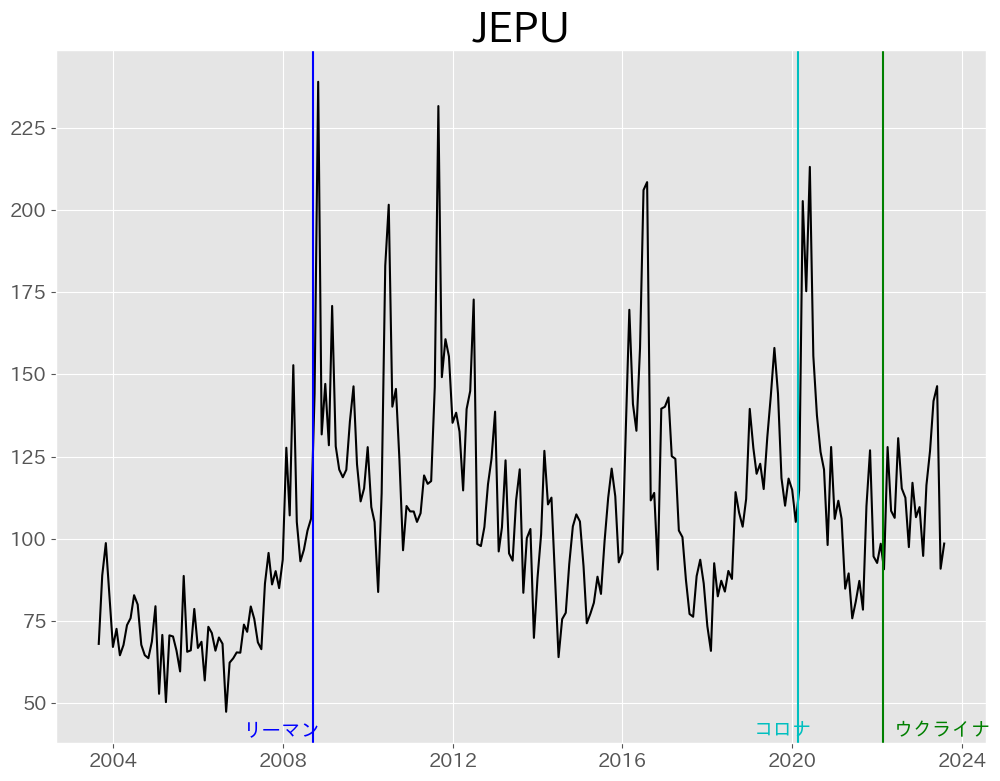

In [69]:
plot_1(df['JPU'],'JEPU')

In [70]:
plt.rcParams['figure.figsize'] = [12, 4] 

In [71]:
def plot_2(df):
    
    """2列のdataframe型を読み込んで1×2のグラフにプロット"""
    
    fig, axes = plt.subplots(1, 2, tight_layout = True)
    
    for l in range(2):
        axes[l].plot(df.iloc[:,l], color = 'k')
        axes[l].set_title(df.columns.values[l])
        axes[l].axvline(datetime.datetime(2008,9,15), color="b")
        axes[l].axvline(datetime.datetime(2020,2,20), color="c")
        axes[l].axvline(datetime.datetime(2022,2,20), color="g")
        
    axes[0].text(0.2, 0.01, "リーマン", transform = axes[0].transAxes, color = 'b')
    axes[0].text(0.7, 0.01, "コロナ", transform = axes[0].transAxes, color = 'c')
    axes[0].text(0.8, 0.01, "ウクライナ", transform = axes[0].transAxes, color = 'g')

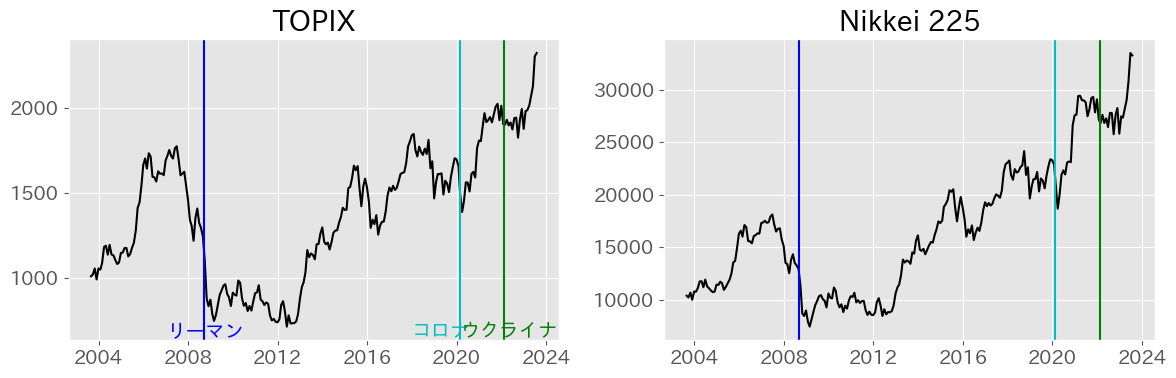

In [72]:
plot_2(df.iloc[:,0:2])

In [73]:
plt.rcParams['figure.figsize'] = [12, 9] 

In [74]:
def plot_4(df):
    
    """4列のdataframe型を読み込んで2×2のグラフにプロット"""
    
    fig, axes = plt.subplots(2, 2, tight_layout = True)
    
    t1 = (0, 0, 1, 1)
    t2 = (0, 1, 0, 1)
    
    for l, m, n in zip(t1, t2, range(4)):
        axes[l, m].plot(df.iloc[:,n], color = 'k')
        axes[l, m].set_title(df.columns.values[n])
        axes[l, m].axvline(datetime.datetime(2008,9,15), color="b")
        axes[l, m].axvline(datetime.datetime(2020,2,20), color="c")
        axes[l, m].axvline(datetime.datetime(2022,2,20), color="g")
        
    axes[0, 0].text(0.2, 0.01, "リーマン", transform = axes[0, 0].transAxes, color = 'b')
    axes[0, 0].text(0.7, 0.01, "コロナ", transform = axes[0, 0].transAxes, color = 'c')
    axes[0, 0].text(0.8, 0.01, "ウクライナ", transform = axes[0, 0].transAxes, color = 'g')

In [75]:
df_ = df[['S&P500', 'BC','USD/JPY','JGB']]
df_.columns = ['S&P500', '景気', 'ドル円','国債金利']
df_

,S&P500,景気,ドル円,国債金利
Date,,,,
2003-08-31,1008.01,107.7,117.05,1.432
2003-09-30,995.97,109.7,111.20,1.398
2003-10-31,1050.71,112.3,108.76,1.463
2003-11-30,1058.20,111.2,109.50,1.315
2003-12-31,1111.92,113.5,107.10,1.363
...,...,...,...,...
2023-03-31,4109.31,114.2,133.48,0.389
2023-04-30,4169.48,114.4,134.05,0.403
2023-05-31,4179.83,114.7,139.80,0.448


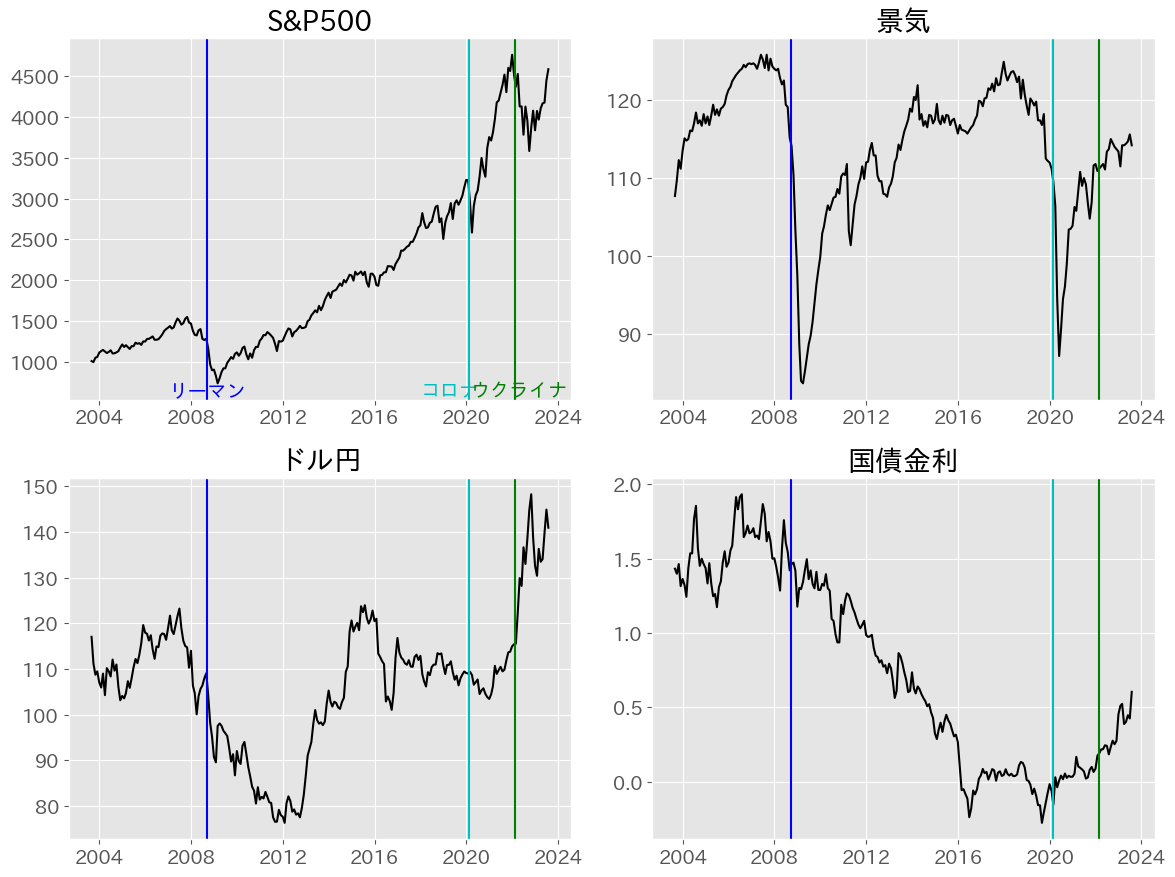

In [76]:
plot_4(df_)

In [77]:
def plot_6(df):
    
    """6列のdataframe型を読み込んで3×2のグラフにプロット"""
    
    fig, axes = plt.subplots(3, 2, tight_layout = True)
    
    t1 = (0, 0, 1, 1, 2, 2)
    t2 = (0, 1, 0, 1, 0, 1)
    
    for l, m, n in zip(t1, t2, range(6)):
        axes[l, m].plot(df.iloc[:,n], color = 'k')
        axes[l, m].set_title(df.columns.values[n])
        axes[l, m].axvline(datetime.datetime(2008,9,15), color="b")
        axes[l, m].axvline(datetime.datetime(2020,2,20), color="c")
        axes[l, m].axvline(datetime.datetime(2022,2,20), color="g")
        
    axes[0, 0].text(0.2, 0.01, "リーマン", transform = axes[0, 0].transAxes, color = 'b')
    axes[0, 0].text(0.7, 0.01, "コロナ", transform = axes[0, 0].transAxes, color = 'c')
    axes[0, 0].text(0.8, 0.01, "ウクライナ", transform = axes[0, 0].transAxes, color = 'g')

In [78]:
#df_scatter = sns.pairplot(df) # 散布図行列

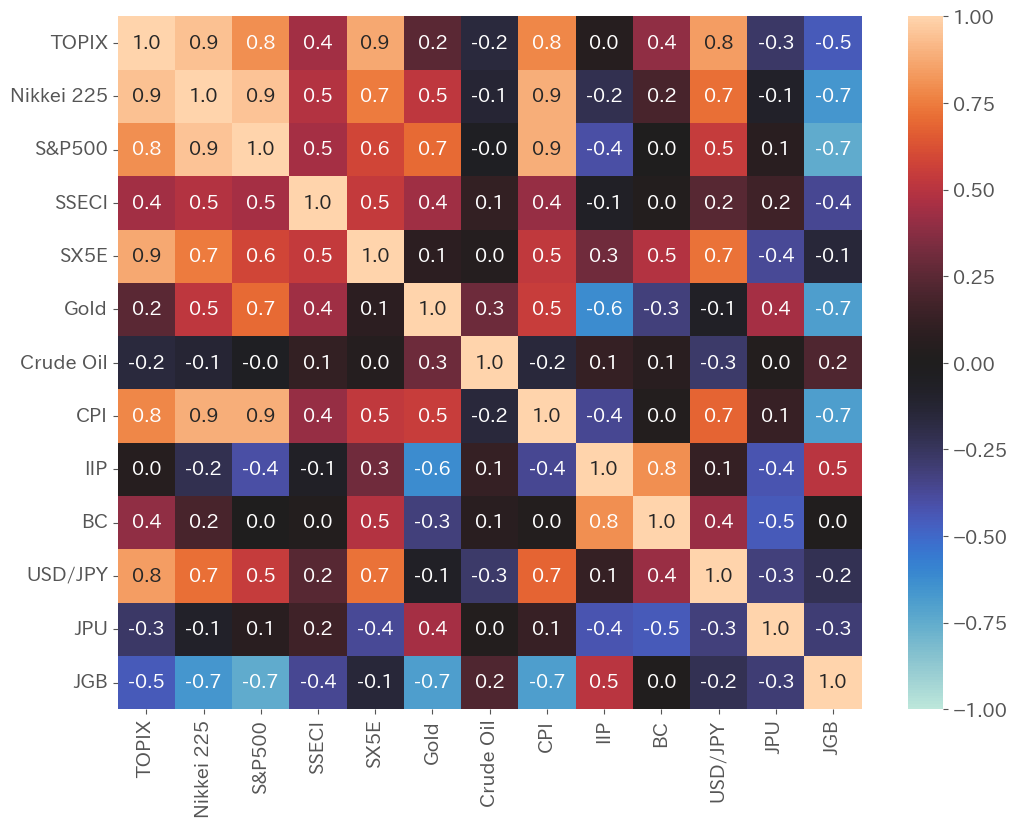

In [79]:
corr_mat = df.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

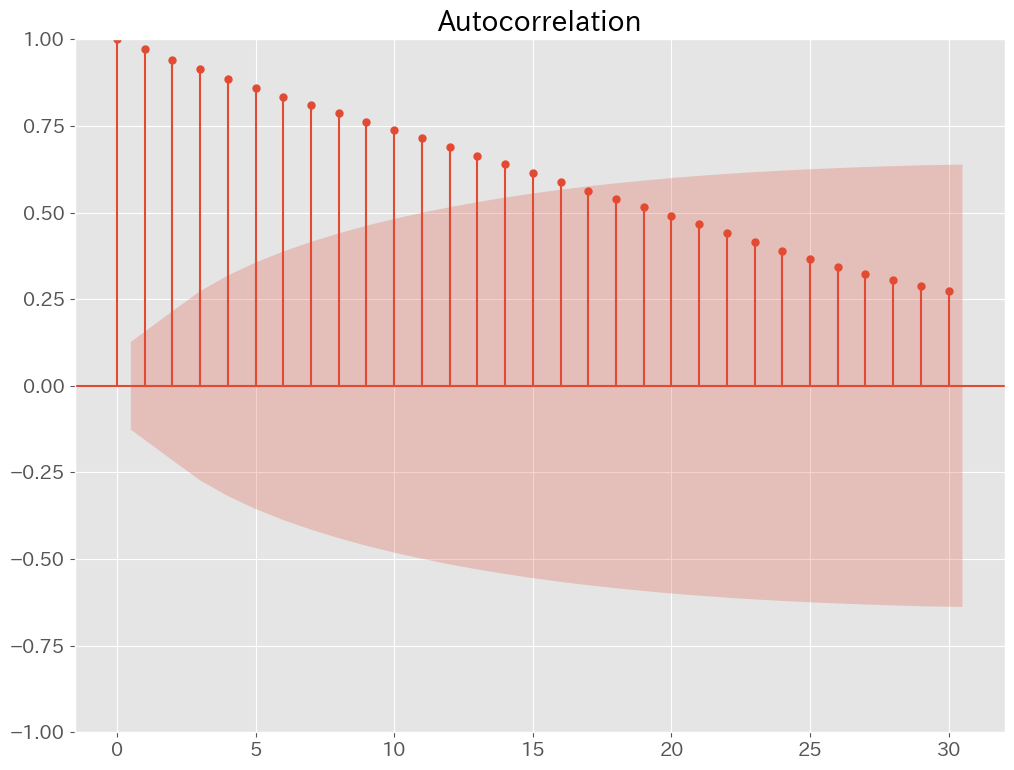

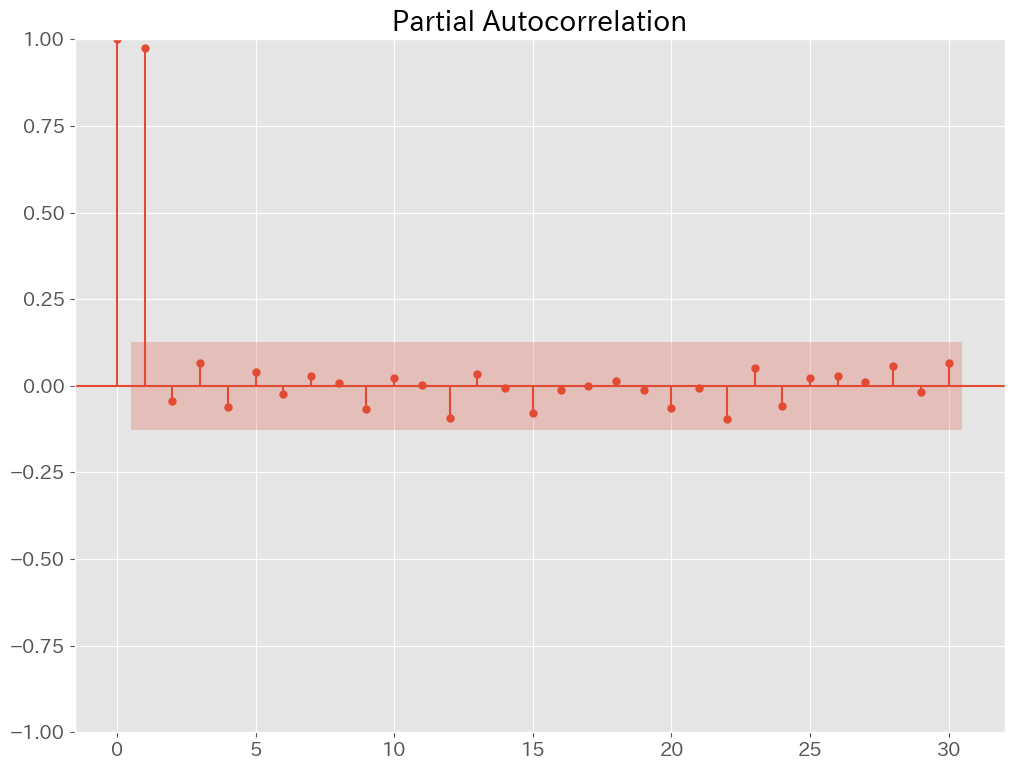

In [80]:
#
# 原系列の自己相関
#

acf = plot_acf(df['TOPIX'], lags=30)   #自己相関
pacf = plot_pacf(df['TOPIX'], lags=30) #偏自己相関

## 定常系列へと処理

### 単位根検定

In [81]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項＋定常過程
#

def ADF_c(df):
    
    for i in range(len(df.columns)):

        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='c')  

        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [82]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項 ＋ 線形トレンド ＋ 定常過程
#

def ADF_ct(df):

    for i in range(len(df.columns)):
    
        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='ct')  
    
        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [83]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項 ＋ 線形トレンド ＋ 非線形トレンド ＋ 定常過程
#

def ADF_ctt(df):

    for i in range(len(df.columns)):
    
        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='ctt')  
    
        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [84]:
df

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JPU,JGB
Date,,,,,,,,,,,,,
2003-08-31,1008.88,10399.53027,1008.01,1423.35,2557.53,383.0,31.28,95.6,110.9,107.7,117.05,68.069990,1.432
2003-09-30,1019.58,10232.57031,995.97,1366.20,2396.69,385.9,29.15,95.7,114.1,109.7,111.20,88.881077,1.398
2003-10-31,1055.32,10693.66016,1050.71,1346.48,2575.90,398.0,29.13,95.7,116.1,112.3,108.76,98.707670,1.463
2003-11-30,990.80,10006.12988,1058.20,1398.71,2631.57,398.9,30.26,95.2,115.7,111.2,109.50,83.109660,1.315
2003-12-31,1055.08,10787.83008,1111.92,1492.72,2760.84,426.3,32.40,95.3,115.6,113.5,107.10,67.138181,1.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,2015.05,28203.34961,4109.31,3277.34,4312.99,2007.5,80.27,104.4,104.8,114.2,133.48,126.677042,0.389
2023-04-30,2070.37,29058.05078,4169.48,3306.48,4353.41,2019.1,76.13,105.1,105.5,114.4,134.05,141.883664,0.403
2023-05-31,2130.77,30886.00977,4179.83,3196.15,4222.56,1981.3,67.60,105.1,103.2,114.7,139.80,146.413234,0.448


In [85]:
df_log = np.log(df[df.columns.values[0:-2]])
df_log

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY
Date,,,,,,,,,,,
2003-08-31,6.916596,9.249516,6.915733,7.260769,7.846797,5.948035,3.442979,4.560173,4.708629,4.679350,4.762601
2003-09-30,6.927146,9.233331,6.903717,7.219788,7.781844,5.955578,3.372455,4.561218,4.737075,4.697749,4.711330
2003-10-31,6.961599,9.277406,6.957221,7.205249,7.853954,5.986452,3.371769,4.561218,4.754452,4.721174,4.689144
2003-11-30,6.898513,9.210953,6.964325,7.243306,7.875336,5.988711,3.409827,4.555980,4.751001,4.711330,4.695925
2003-12-31,6.961372,9.286174,7.013844,7.308355,7.923290,6.055143,3.478158,4.557030,4.750136,4.731803,4.673763
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,7.608399,10.247196,8.321010,8.094787,8.369387,7.604645,4.385396,4.648230,4.652054,4.737951,4.893952
2023-04-30,7.635483,10.277051,8.335547,8.103639,8.378715,7.610407,4.332442,4.654912,4.658711,4.739701,4.898213
2023-05-31,7.664239,10.338059,8.338026,8.069702,8.348197,7.591508,4.213608,4.654912,4.636669,4.742320,4.940213


In [86]:
df_original = pd.merge(df_log, df.iloc[:,-2:], how = 'inner', on = 'Date')
df_original

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JPU,JGB
Date,,,,,,,,,,,,,
2003-08-31,6.916596,9.249516,6.915733,7.260769,7.846797,5.948035,3.442979,4.560173,4.708629,4.679350,4.762601,68.069990,1.432
2003-09-30,6.927146,9.233331,6.903717,7.219788,7.781844,5.955578,3.372455,4.561218,4.737075,4.697749,4.711330,88.881077,1.398
2003-10-31,6.961599,9.277406,6.957221,7.205249,7.853954,5.986452,3.371769,4.561218,4.754452,4.721174,4.689144,98.707670,1.463
2003-11-30,6.898513,9.210953,6.964325,7.243306,7.875336,5.988711,3.409827,4.555980,4.751001,4.711330,4.695925,83.109660,1.315
2003-12-31,6.961372,9.286174,7.013844,7.308355,7.923290,6.055143,3.478158,4.557030,4.750136,4.731803,4.673763,67.138181,1.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,7.608399,10.247196,8.321010,8.094787,8.369387,7.604645,4.385396,4.648230,4.652054,4.737951,4.893952,126.677042,0.389
2023-04-30,7.635483,10.277051,8.335547,8.103639,8.378715,7.610407,4.332442,4.654912,4.658711,4.739701,4.898213,141.883664,0.403
2023-05-31,7.664239,10.338059,8.338026,8.069702,8.348197,7.591508,4.213608,4.654912,4.636669,4.742320,4.940213,146.413234,0.448


In [87]:
ADF_c(df_original)

TOPIX 	 0.7604288810571915
Nikkei 225 	 0.8900121468007663
S&P500 	 0.9611607797004553
SSECI 	 0.04697321682573039
SX5E 	 0.16908108873410105
Gold 	 0.286680440315042
Crude Oil 	 0.006479561976547156
CPI 	 0.9813220546482442
IIP 	 0.048483154071319465
BC 	 0.03561527249299564
USD/JPY 	 0.786065203773274
JPU 	 0.003619813847930706
JGB 	 0.6400101619982997


In [88]:
ADF_ct(df_original)

TOPIX 	 0.8113079834293628
Nikkei 225 	 0.7869502166644253
S&P500 	 0.6938501626601807
SSECI 	 0.035182027361520145
SX5E 	 0.2981030870109458
Gold 	 0.6921954131525536
Crude Oil 	 0.03428736071572062
CPI 	 0.7854325617724545
IIP 	 0.029507003447850875
BC 	 0.1323591625872173
USD/JPY 	 0.8726935705049116
JPU 	 0.010422988082534718
JGB 	 0.8449738500231296


In [89]:
ADF_ctt(df_original)

TOPIX 	 0.67814431036908
Nikkei 225 	 0.6176318495787578
S&P500 	 0.21056555940903782
SSECI 	 0.05984262484971932
SX5E 	 0.19543031595061028
Gold 	 0.9408268217546661
Crude Oil 	 0.15615517760573533
CPI 	 0.12237612029975947
IIP 	 0.053111228519427046
BC 	 0.29378658742847696
USD/JPY 	 0.8062270550482713
JPU 	 0.00893762671333809
JGB 	 0.7718440513284557


### 変換

In [90]:
df.columns.values

array(['TOPIX', 'Nikkei 225', 'S&P500', 'SSECI', 'SX5E', 'Gold',
       'Crude Oil', 'CPI', 'IIP', 'BC', 'USD/JPY', 'JPU', 'JGB'],
      dtype=object)

In [91]:
df_diff = df_original[['TOPIX', 'Nikkei 225', 'S&P500','SSECI','SX5E', 'Gold','Crude Oil', 'CPI', 'IIP', 'BC', 'USD/JPY','JGB']].diff().dropna()
df_diff

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JGB
Date,,,,,,,,,,,,
2003-09-30,0.010550,-0.016185,-0.012016,-0.040980,-0.064953,0.007543,-0.070524,0.001045,0.028446,0.018400,-0.051271,-0.034
2003-10-31,0.034453,0.044075,0.053504,-0.014539,0.072110,0.030874,-0.000686,0.000000,0.017377,0.023424,-0.022187,0.065
2003-11-30,-0.063087,-0.066453,0.007103,0.038057,0.021382,0.002259,0.038058,-0.005238,-0.003451,-0.009843,0.006781,-0.148
2003-12-31,0.062859,0.075221,0.049519,0.065050,0.047954,0.066433,0.068332,0.001050,-0.000865,0.020472,-0.022162,0.048
2004-01-31,-0.006065,-0.000269,0.017129,0.088379,0.028001,-0.055959,0.024391,-0.002101,0.016302,0.013998,-0.010607,-0.041
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.012821,0.030228,0.034451,-0.000549,0.016271,0.073415,0.043540,0.003839,0.002867,0.000000,-0.020833,-0.135
2023-04-30,0.027083,0.029855,0.014536,0.008852,0.009328,0.005762,-0.052954,0.006683,0.006657,0.001750,0.004261,0.014
2023-05-31,0.028756,0.061008,0.002479,-0.033937,-0.030518,-0.018899,-0.118834,0.000000,-0.022042,0.002619,0.042000,0.045


In [92]:
ADF_c(df_diff)

TOPIX 	 1.0040650920872638e-25
Nikkei 225 	 6.351943108198698e-27
S&P500 	 1.4618097976966078e-08
SSECI 	 3.8645451478554803e-07
SX5E 	 2.341887570660457e-21
Gold 	 5.503310117909542e-30
Crude Oil 	 2.7138932989710687e-19
CPI 	 0.14199982174862746
IIP 	 3.613040878080162e-25
BC 	 3.2056577179774723e-18
USD/JPY 	 5.857354318485424e-27
JGB 	 9.085833167883924e-23


In [93]:
ADF_ct(df_diff)

TOPIX 	 1.868700691950245e-21
Nikkei 225 	 4.539093807315524e-22
S&P500 	 1.5429678221190234e-07
SSECI 	 3.753389946185055e-06
SX5E 	 1.7802014818119968e-18
Gold 	 0.0
Crude Oil 	 6.976254413219559e-17
CPI 	 0.19500128696017394
IIP 	 4.139340745498078e-21
BC 	 5.743478117134506e-16
USD/JPY 	 3.805036350621701e-22
JGB 	 1.3961080121134506e-19


In [94]:
ADF_ctt(df_diff)

TOPIX 	 2.0193991789696086e-22
Nikkei 225 	 2.6171764628855126e-23
S&P500 	 9.291442929451327e-07
SSECI 	 1.948591275700617e-05
SX5E 	 9.513746403702422e-19
Gold 	 0.0
Crude Oil 	 5.822531735326236e-17
CPI 	 0.32018256651882016
IIP 	 6.66455359889625e-22
BC 	 1.068787696827631e-15
USD/JPY 	 1.966125244339281e-23
JGB 	 1.43392893485624e-20


In [95]:
df_changed = pd.merge(df_diff, df_original.loc['2003-09-30':, ['JPU']], how = 'inner', on = 'Date')
df_changed#.to_csv("df_changed.csv")

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JGB,JPU
Date,,,,,,,,,,,,,
2003-09-30,0.010550,-0.016185,-0.012016,-0.040980,-0.064953,0.007543,-0.070524,0.001045,0.028446,0.018400,-0.051271,-0.034,88.881077
2003-10-31,0.034453,0.044075,0.053504,-0.014539,0.072110,0.030874,-0.000686,0.000000,0.017377,0.023424,-0.022187,0.065,98.707670
2003-11-30,-0.063087,-0.066453,0.007103,0.038057,0.021382,0.002259,0.038058,-0.005238,-0.003451,-0.009843,0.006781,-0.148,83.109660
2003-12-31,0.062859,0.075221,0.049519,0.065050,0.047954,0.066433,0.068332,0.001050,-0.000865,0.020472,-0.022162,0.048,67.138181
2004-01-31,-0.006065,-0.000269,0.017129,0.088379,0.028001,-0.055959,0.024391,-0.002101,0.016302,0.013998,-0.010607,-0.041,72.644721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.012821,0.030228,0.034451,-0.000549,0.016271,0.073415,0.043540,0.003839,0.002867,0.000000,-0.020833,-0.135,126.677042
2023-04-30,0.027083,0.029855,0.014536,0.008852,0.009328,0.005762,-0.052954,0.006683,0.006657,0.001750,0.004261,0.014,141.883664
2023-05-31,0.028756,0.061008,0.002479,-0.033937,-0.030518,-0.018899,-0.118834,0.000000,-0.022042,0.002619,0.042000,0.045,146.413234


### 基本統計量

In [96]:
df_changed.describe()#.to_csv("基本統計量(df_changed).csv")

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JGB,JPU
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.003497,0.004868,0.006342,0.003504,0.002336,0.006925,0.004014,0.000420,-0.000277,0.000245,0.000777,-0.003460,107.185826
std,0.050403,0.055060,0.043069,0.075904,0.050361,0.049717,0.113513,0.003075,0.025485,0.019342,0.026472,0.083478,32.873043
min,-0.224329,-0.269675,-0.185636,-0.279940,-0.195124,-0.170824,-0.776628,-0.009255,-0.179728,-0.118606,-0.076583,-0.288000,47.431749
25%,-0.022686,-0.020180,-0.016065,-0.034216,-0.028566,-0.023180,-0.053702,-0.001058,-0.007972,-0.006062,-0.014336,-0.050000,83.723936
50%,0.007317,0.008706,0.012117,0.006498,0.009328,0.005762,0.017049,0.000000,0.001812,0.002426,-0.000825,-0.007000,105.147599
75%,0.035508,0.040507,0.031987,0.042801,0.033716,0.037960,0.068521,0.002101,0.012988,0.010074,0.016090,0.044000,124.307524
max,0.120872,0.141523,0.119421,0.258706,0.164207,0.147038,0.614788,0.020683,0.065742,0.043485,0.085010,0.279000,238.939143


### 可視化

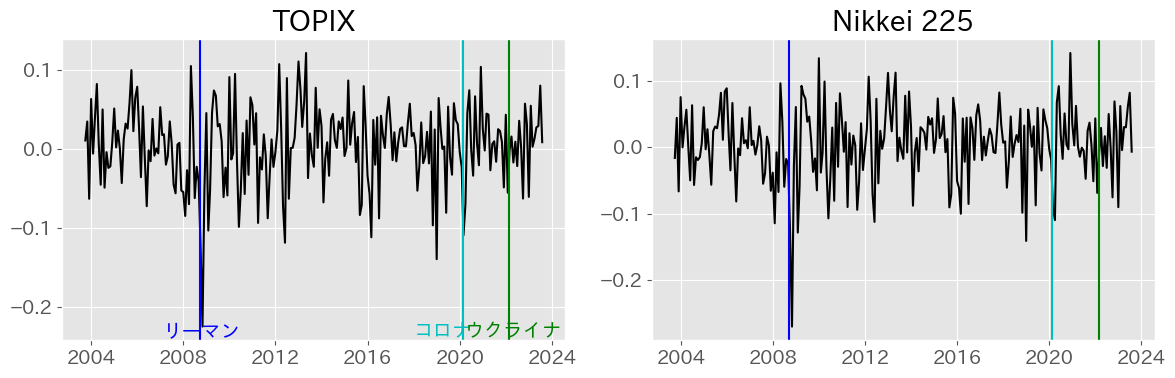

In [97]:
plt.rcParams['figure.figsize'] = [12, 4] 
plot_2(df_changed.iloc[:,0:2])

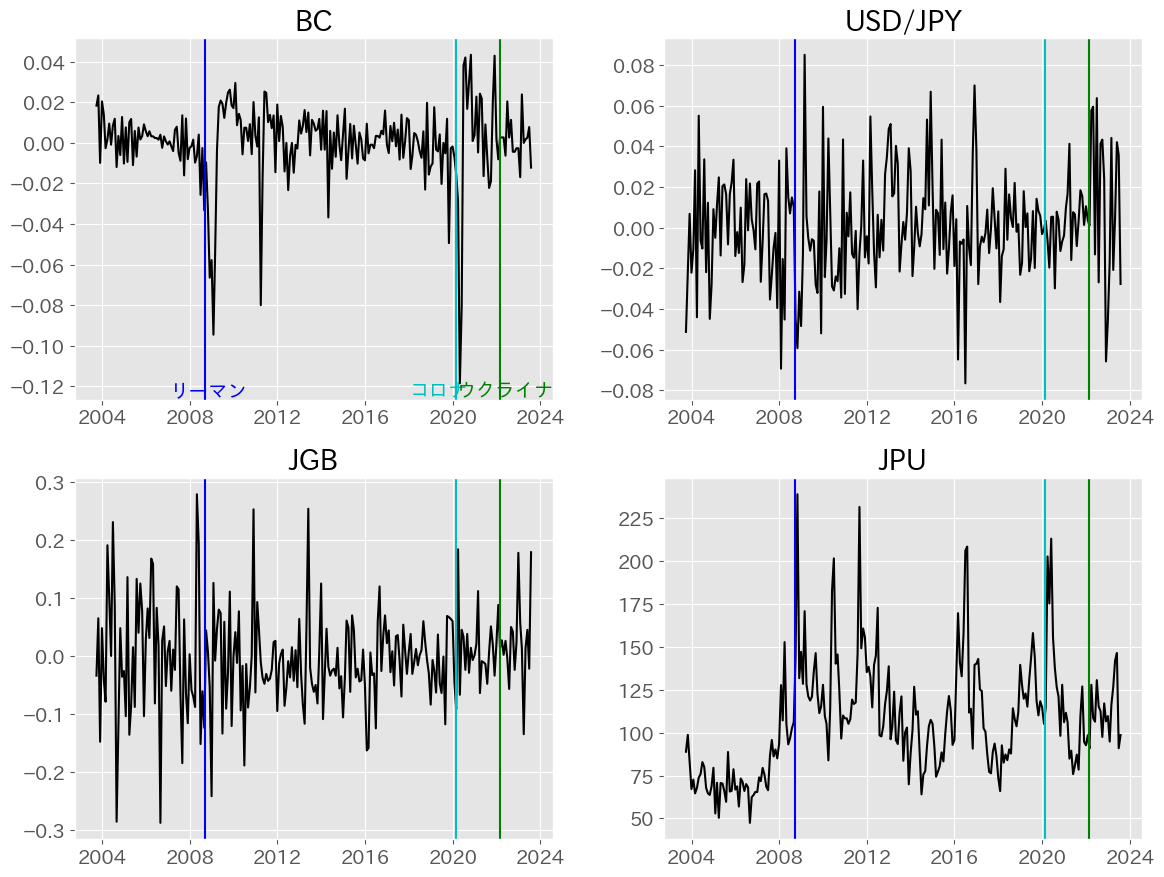

In [98]:
plt.rcParams['figure.figsize'] = [12, 9] 
plot_4(df_changed.iloc[:,9:13])

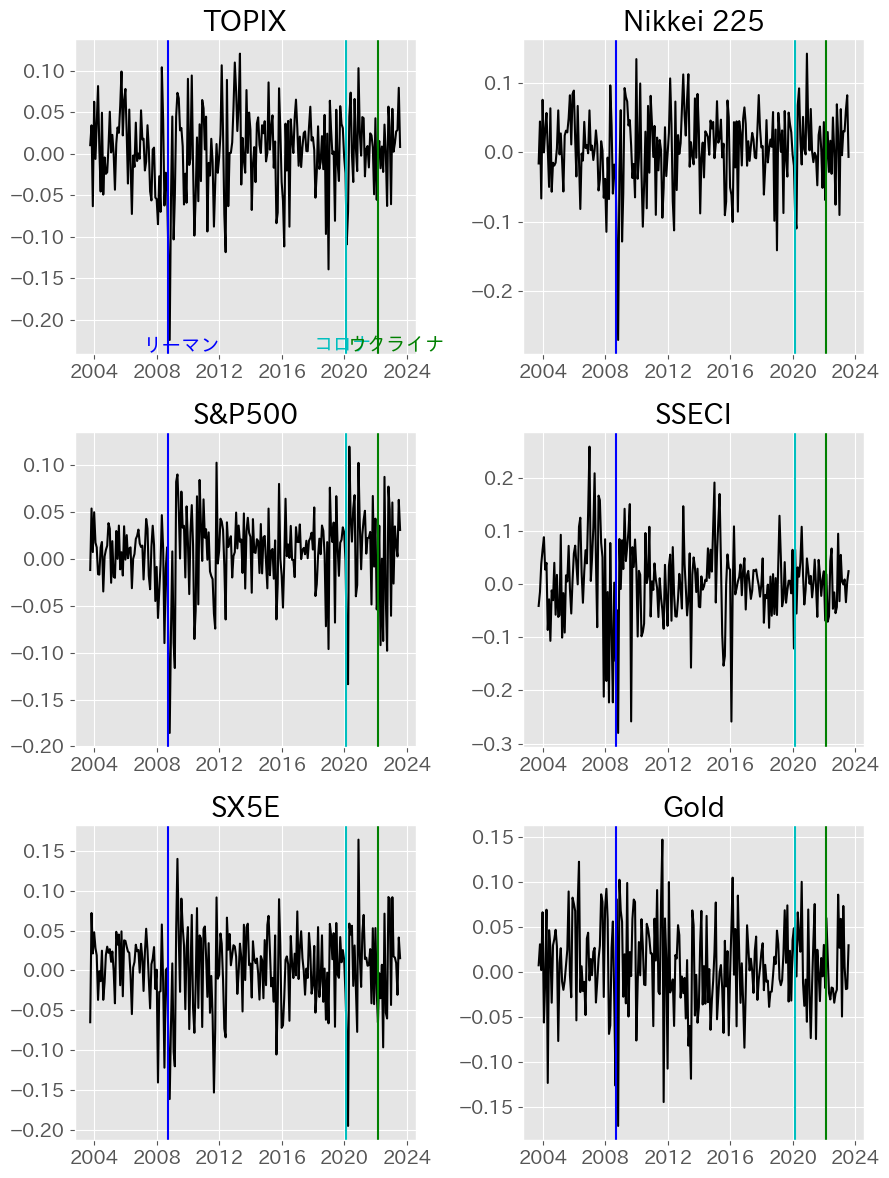

In [99]:
plt.rcParams['figure.figsize'] = [9, 12] 
plot_6(df_changed)

In [100]:
#df_scatter = sns.pairplot(df_changed) # 散布図行列

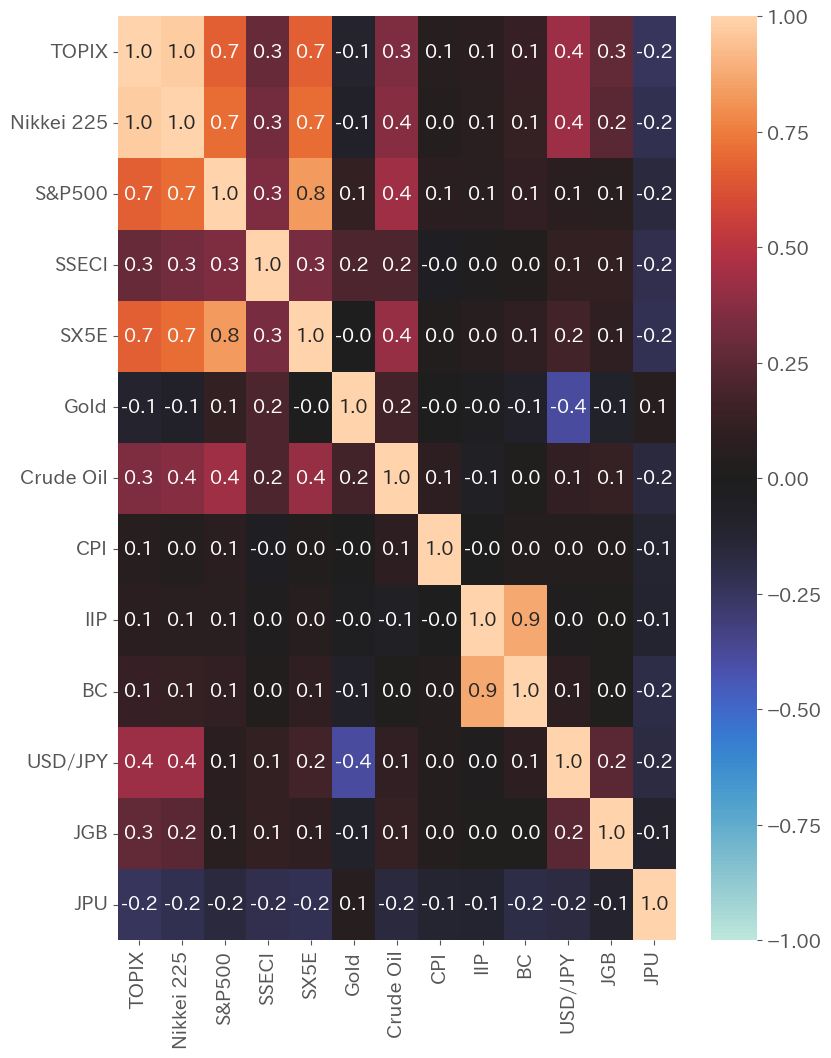

In [101]:
corr_mat = df_changed.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

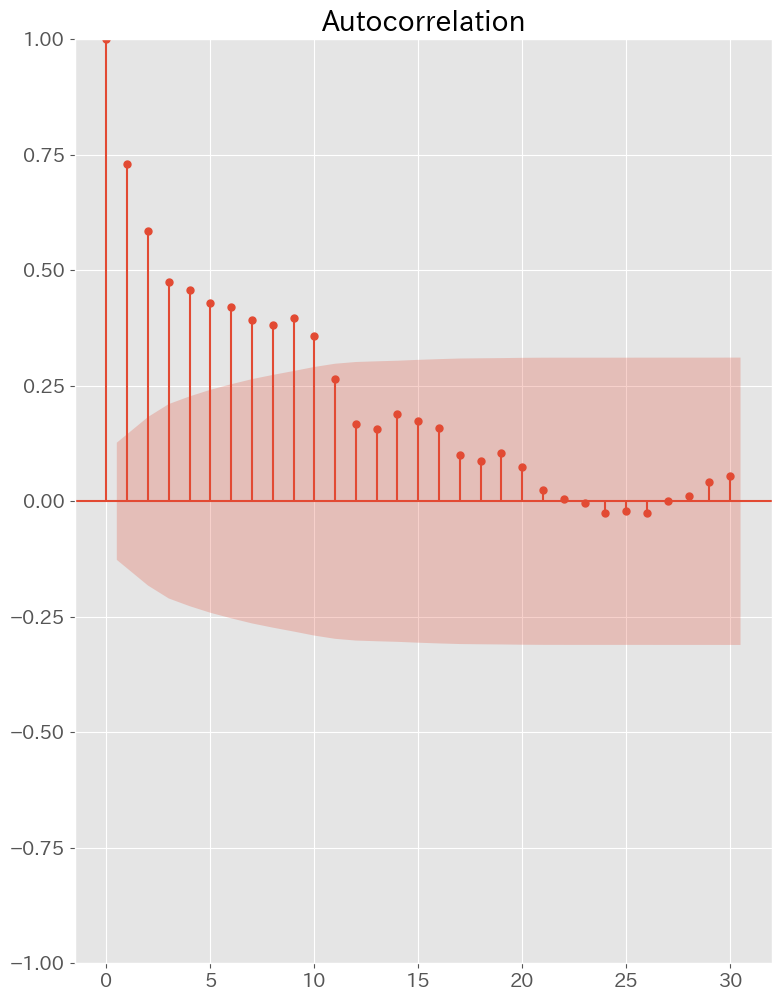

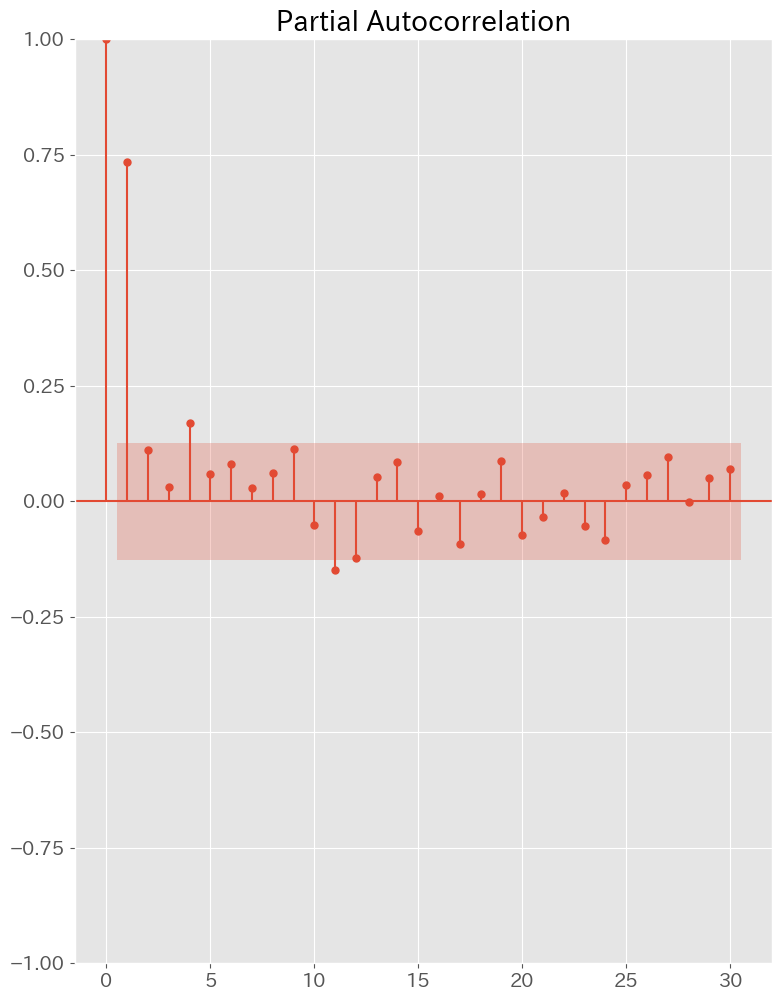

In [102]:
#
#定常系列の自己相関
#

acf = plot_acf(df_changed['JPU'], lags=30)   #自己相関
pacf = plot_pacf(df_changed['JPU'], lags=30) #偏自己相関

### 1期前との相関

In [103]:
df_changed

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JGB,JPU
Date,,,,,,,,,,,,,
2003-09-30,0.010550,-0.016185,-0.012016,-0.040980,-0.064953,0.007543,-0.070524,0.001045,0.028446,0.018400,-0.051271,-0.034,88.881077
2003-10-31,0.034453,0.044075,0.053504,-0.014539,0.072110,0.030874,-0.000686,0.000000,0.017377,0.023424,-0.022187,0.065,98.707670
2003-11-30,-0.063087,-0.066453,0.007103,0.038057,0.021382,0.002259,0.038058,-0.005238,-0.003451,-0.009843,0.006781,-0.148,83.109660
2003-12-31,0.062859,0.075221,0.049519,0.065050,0.047954,0.066433,0.068332,0.001050,-0.000865,0.020472,-0.022162,0.048,67.138181
2004-01-31,-0.006065,-0.000269,0.017129,0.088379,0.028001,-0.055959,0.024391,-0.002101,0.016302,0.013998,-0.010607,-0.041,72.644721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.012821,0.030228,0.034451,-0.000549,0.016271,0.073415,0.043540,0.003839,0.002867,0.000000,-0.020833,-0.135,126.677042
2023-04-30,0.027083,0.029855,0.014536,0.008852,0.009328,0.005762,-0.052954,0.006683,0.006657,0.001750,0.004261,0.014,141.883664
2023-05-31,0.028756,0.061008,0.002479,-0.033937,-0.030518,-0.018899,-0.118834,0.000000,-0.022042,0.002619,0.042000,0.045,146.413234


In [104]:
df_TOPIX = df_changed.iloc[1:,[0]]
df_TOPIX.reset_index(drop = True, inplace = True)
df_TOPIX

,TOPIX
0,0.034453
1,-0.063087
2,0.062859
3,-0.006065
4,0.037920
...,...
233,0.012821
234,0.027083
235,0.028756
236,0.079720


In [105]:
df_others = df_changed.iloc[:-1,1:]
df_others.reset_index(drop = True, inplace = True)
df_others

,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JGB,JPU
0,-0.016185,-0.012016,-0.040980,-0.064953,0.007543,-0.070524,0.001045,0.028446,0.018400,-0.051271,-0.034,88.881077
1,0.044075,0.053504,-0.014539,0.072110,0.030874,-0.000686,0.000000,0.017377,0.023424,-0.022187,0.065,98.707670
2,-0.066453,0.007103,0.038057,0.021382,0.002259,0.038058,-0.005238,-0.003451,-0.009843,0.006781,-0.148,83.109660
3,0.075221,0.049519,0.065050,0.047954,0.066433,0.068332,0.001050,-0.000865,0.020472,-0.022162,0.048,67.138181
4,-0.000269,0.017129,0.088379,0.028001,-0.055959,0.024391,-0.002101,0.016302,0.013998,-0.010607,-0.041,72.644721
...,...,...,...,...,...,...,...,...,...,...,...,...
233,-0.004370,-0.026459,0.005179,0.017729,-0.049316,-0.029110,-0.006708,0.036049,0.023927,0.044102,0.013,116.283891
234,0.030228,0.034451,-0.000549,0.016271,0.073415,0.043540,0.003839,0.002867,0.000000,-0.020833,-0.135,126.677042
235,0.029855,0.014536,0.008852,0.009328,0.005762,-0.052954,0.006683,0.006657,0.001750,0.004261,0.014,141.883664
236,0.061008,0.002479,-0.033937,-0.030518,-0.018899,-0.118834,0.000000,-0.022042,0.002619,0.042000,0.045,146.413234


In [106]:
df_shifted = pd.concat([df_TOPIX,df_others], axis = 1)
df_shifted

,TOPIX,Nikkei 225,S&P500,SSECI,SX5E,Gold,Crude Oil,CPI,IIP,BC,USD/JPY,JGB,JPU
0,0.034453,-0.016185,-0.012016,-0.040980,-0.064953,0.007543,-0.070524,0.001045,0.028446,0.018400,-0.051271,-0.034,88.881077
1,-0.063087,0.044075,0.053504,-0.014539,0.072110,0.030874,-0.000686,0.000000,0.017377,0.023424,-0.022187,0.065,98.707670
2,0.062859,-0.066453,0.007103,0.038057,0.021382,0.002259,0.038058,-0.005238,-0.003451,-0.009843,0.006781,-0.148,83.109660
3,-0.006065,0.075221,0.049519,0.065050,0.047954,0.066433,0.068332,0.001050,-0.000865,0.020472,-0.022162,0.048,67.138181
4,0.037920,-0.000269,0.017129,0.088379,0.028001,-0.055959,0.024391,-0.002101,0.016302,0.013998,-0.010607,-0.041,72.644721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.012821,-0.004370,-0.026459,0.005179,0.017729,-0.049316,-0.029110,-0.006708,0.036049,0.023927,0.044102,0.013,116.283891
234,0.027083,0.030228,0.034451,-0.000549,0.016271,0.073415,0.043540,0.003839,0.002867,0.000000,-0.020833,-0.135,126.677042
235,0.028756,0.029855,0.014536,0.008852,0.009328,0.005762,-0.052954,0.006683,0.006657,0.001750,0.004261,0.014,141.883664
236,0.079720,0.061008,0.002479,-0.033937,-0.030518,-0.018899,-0.118834,0.000000,-0.022042,0.002619,0.042000,0.045,146.413234


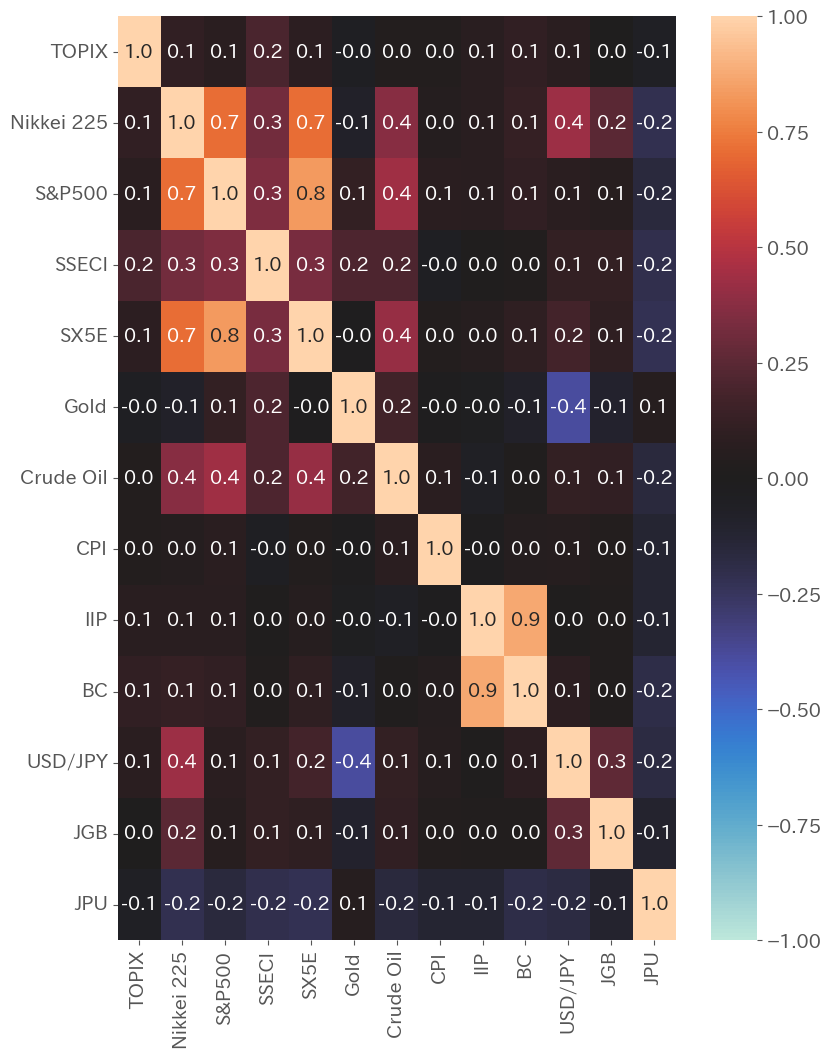

In [107]:
corr_mat = df_shifted.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

### 変数選択

In [108]:
df_changed.columns.values

array(['TOPIX', 'Nikkei 225', 'S&P500', 'SSECI', 'SX5E', 'Gold',
       'Crude Oil', 'CPI', 'IIP', 'BC', 'USD/JPY', 'JGB', 'JPU'],
      dtype=object)

In [109]:
df_candidate = df_changed[['BC', 'CPI', 'JGB','USD/JPY', 'Gold', 'Crude Oil', 'S&P500', 'SX5E', 'SSECI']]
df_candidate

,BC,CPI,JGB,USD/JPY,Gold,Crude Oil,S&P500,SX5E,SSECI
Date,,,,,,,,,
2003-09-30,0.018400,0.001045,-0.034,-0.051271,0.007543,-0.070524,-0.012016,-0.064953,-0.040980
2003-10-31,0.023424,0.000000,0.065,-0.022187,0.030874,-0.000686,0.053504,0.072110,-0.014539
2003-11-30,-0.009843,-0.005238,-0.148,0.006781,0.002259,0.038058,0.007103,0.021382,0.038057
2003-12-31,0.020472,0.001050,0.048,-0.022162,0.066433,0.068332,0.049519,0.047954,0.065050
2004-01-31,0.013998,-0.002101,-0.041,-0.010607,-0.055959,0.024391,0.017129,0.028001,0.088379
...,...,...,...,...,...,...,...,...,...
2023-03-31,0.000000,0.003839,-0.135,-0.020833,0.073415,0.043540,0.034451,0.016271,-0.000549
2023-04-30,0.001750,0.006683,0.014,0.004261,0.005762,-0.052954,0.014536,0.009328,0.008852
2023-05-31,0.002619,0.000000,0.045,0.042000,-0.018899,-0.118834,0.002479,-0.030518,-0.033937


In [110]:
# #変数選択
# df_randomized = pd.merge(df_changed[['JPU']], df_changed[random.sample(df_candidate.columns.values.tolist(), k = 4)], how = 'inner', on = 'Date')
# df_randomized = pd.merge(df_randomized, df_changed[['TOPIX']], how = 'inner', on = 'Date')
# df_randomized

In [111]:
#変数選択
#df_selected = df_changed[[ 'S&P500', 'JPU', 'USD/JPY', 'BC', 'JGB', 'TOPIX']]
df_selected = df_changed[[ 'S&P500', 'JPU', 'BC','USD/JPY',  'JGB', 'TOPIX']]
df_selected.columns = ['S&P500', 'JEPU', '景気', 'ドル円', '国債金利', 'TOPIX']
df_selected

,S&P500,JEPU,景気,ドル円,国債金利,TOPIX
Date,,,,,,
2003-09-30,-0.012016,88.881077,0.018400,-0.051271,-0.034,0.010550
2003-10-31,0.053504,98.707670,0.023424,-0.022187,0.065,0.034453
2003-11-30,0.007103,83.109660,-0.009843,0.006781,-0.148,-0.063087
2003-12-31,0.049519,67.138181,0.020472,-0.022162,0.048,0.062859
2004-01-31,0.017129,72.644721,0.013998,-0.010607,-0.041,-0.006065
...,...,...,...,...,...,...
2023-03-31,0.034451,126.677042,0.000000,-0.020833,-0.135,0.012821
2023-04-30,0.014536,141.883664,0.001750,0.004261,0.014,0.027083
2023-05-31,0.002479,146.413234,0.002619,0.042000,0.045,0.028756


## 分析モデル

### VARモデル

In [112]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
var_model = VAR(df_selected)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(10).summary())

# 最適なラグの探索
lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_VAR = var_model.fit(lag['bic'])

# 結果出力
print(results_VAR.summary())

最適なラグ： 1 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jan, 2024
Time:                     05:59:28
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -26.7421
Nobs:                     238.000    HQIC:                  -27.1079
Log likelihood:           1270.98    FPE:                1.31821e-12
AIC:                     -27.3548    Det(Omega_mle):     1.10777e-12
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.004864         0.009906           -0.491           0.623
L1.S&P500        -0.063339         0.091093           -0.695           0.487
L1.JEPU           0.000103         0.000088            1.163    

### グレンジャー因果性検定

In [113]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df_selected.columns)):
    for j in range(len(df_selected.columns)):
        if i != j :
            #因果の検定
            test_c_VAR = results_VAR.test_causality(causing=i, caused=j) 
            #p値
            test_c_VAR.pvalue
            #検定結果の出力
            print(df_selected.columns[i],'->',df_selected.columns[j],'\t',test_c_VAR.pvalue)

S&P500 -> JEPU 	 0.6146424082916955
S&P500 -> 景気 	 0.014579507908206002
S&P500 -> ドル円 	 0.7930341138354817
S&P500 -> 国債金利 	 0.5758705578324458
S&P500 -> TOPIX 	 0.8990420464086907
JEPU -> S&P500 	 0.24491430493580538
JEPU -> 景気 	 0.7263093633764715
JEPU -> ドル円 	 0.11634921744110753
JEPU -> 国債金利 	 0.5334142719686561
JEPU -> TOPIX 	 0.8332950070252378
景気 -> S&P500 	 0.0028615908136442846
景気 -> JEPU 	 0.10889436283544437
景気 -> ドル円 	 0.2514470640517975
景気 -> 国債金利 	 0.6857054296796531
景気 -> TOPIX 	 0.18312080428722005
ドル円 -> S&P500 	 0.583680152540921
ドル円 -> JEPU 	 0.6560811207543733
ドル円 -> 景気 	 0.5006573939951313
ドル円 -> 国債金利 	 0.1902402533922027
ドル円 -> TOPIX 	 0.6465781642191375
国債金利 -> S&P500 	 0.2653585444678891
国債金利 -> JEPU 	 0.5473059571981714
国債金利 -> 景気 	 0.6809715728889112
国債金利 -> ドル円 	 0.8682368339808074
国債金利 -> TOPIX 	 0.6711628393697602
TOPIX -> S&P500 	 0.2782389859551641
TOPIX -> JEPU 	 0.35779613463657156
TOPIX -> 景気 	 0.6992625692249215
TOPIX -> ドル円 	 0.0992632576945074
TOPIX 

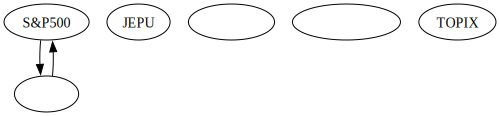

In [114]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph = Digraph()

# グラフにノードを追加
for i in range(len(df_selected.columns)):
    graph.node(df_selected.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df_selected.columns)):
    for j in range(len(df_selected.columns)):
        if i != j :
            #因果の検定
            test_c_VAR = results_VAR.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_VAR.pvalue < 0.05:
                graph.edge(df_selected.columns[i], df_selected.columns[j])

# 有向グラフを表示
graph

### インパルス応答関数

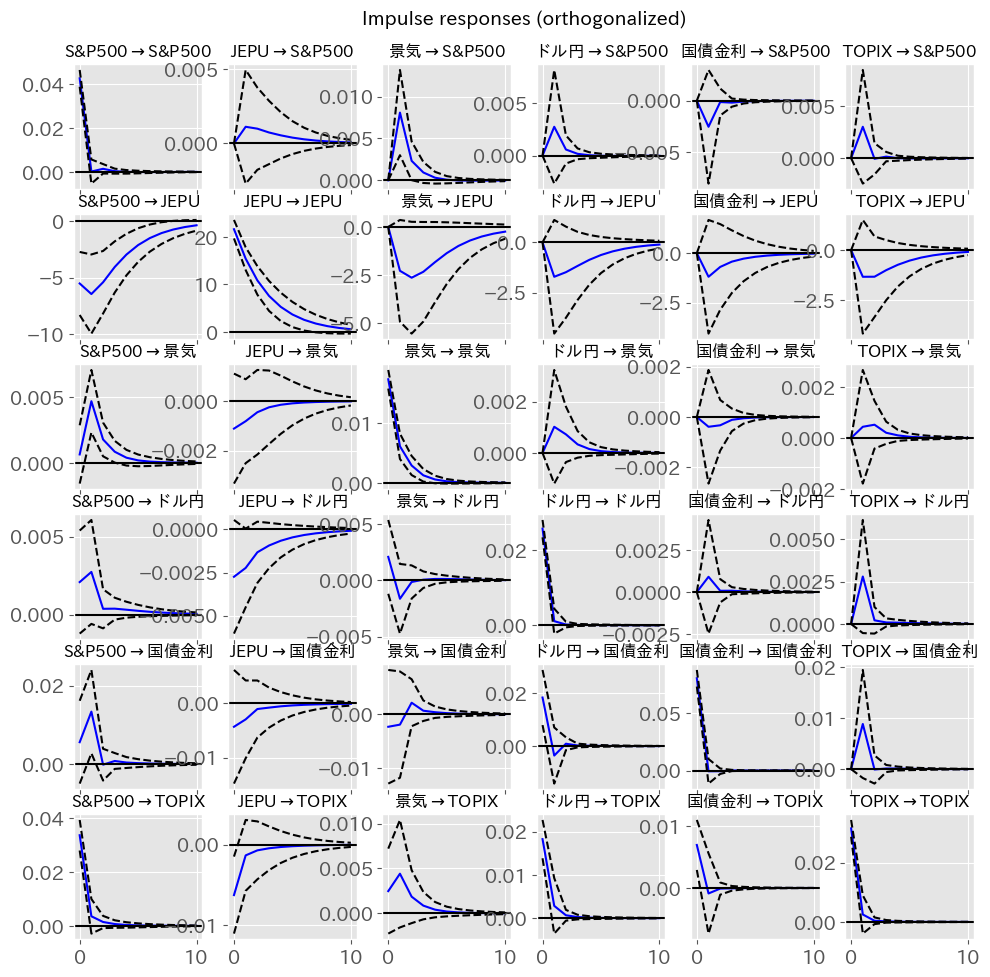

In [115]:
#インパルス応答関数
    
irf = results_VAR.irf()
irf.plot(orth=True)
plt.show()

### 予測誤差分散分解

In [116]:
fevd = results_VAR.fevd(11)
fevd.summary()

FEVD for S&P500
        S&P500      JEPU        景気       ドル円      国債金利     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1     0.952874  0.000662  0.034420  0.003965  0.003344  0.004735
2     0.949547  0.001177  0.037098  0.004124  0.003338  0.004715
3     0.948800  0.001461  0.037527  0.004136  0.003353  0.004723
4     0.948599  0.001617  0.037570  0.004136  0.003356  0.004722
5     0.948519  0.001697  0.037570  0.004136  0.003357  0.004722
6     0.948480  0.001738  0.037568  0.004136  0.003357  0.004722
7     0.948460  0.001758  0.037568  0.004136  0.003357  0.004722
8     0.948449  0.001768  0.037568  0.004136  0.003357  0.004722
9     0.948444  0.001773  0.037568  0.004136  0.003357  0.004722
10    0.948442  0.001775  0.037568  0.004136  0.003357  0.004722

FEVD for JEPU
        S&P500      JEPU        景気       ドル円      国債金利     TOPIX
0     0.060983  0.939017  0.000000  0.000000  0.000000  0.000000
1     0.091134  0.894451  0.006616  0.003726  0.001818  0.0

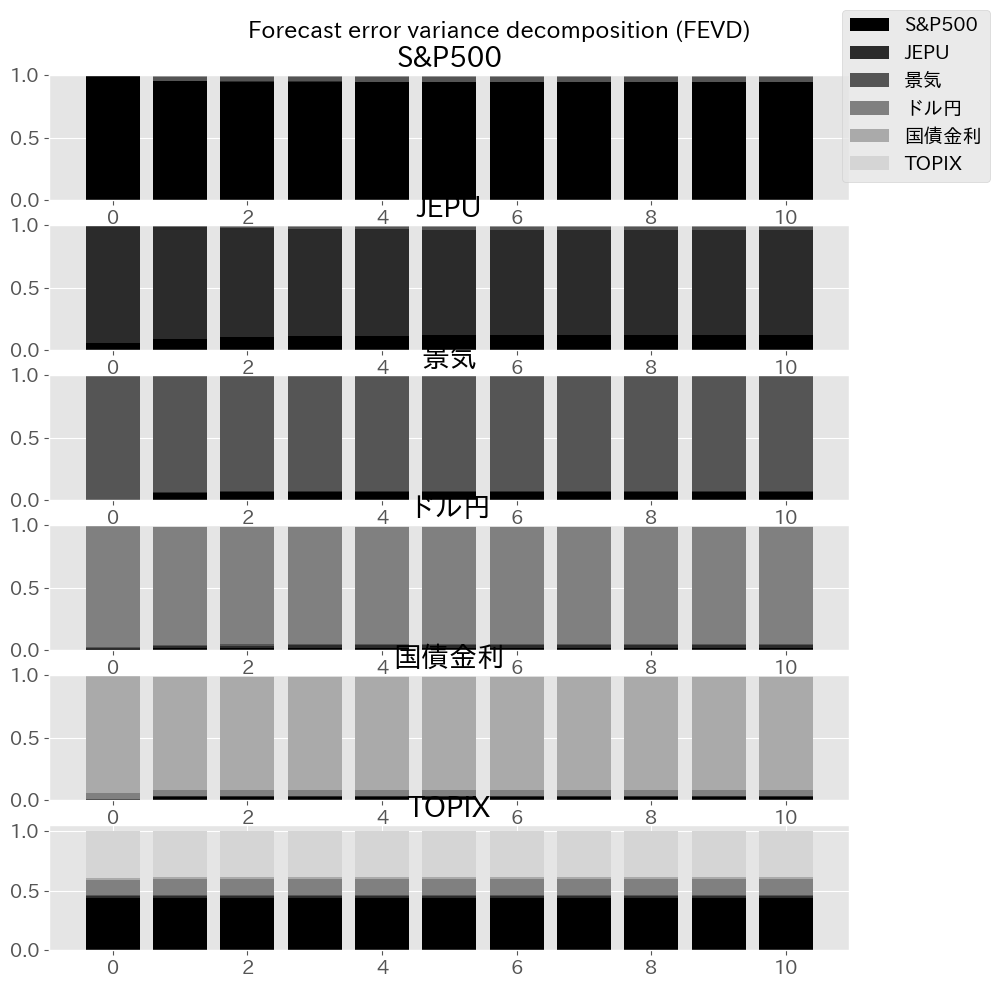

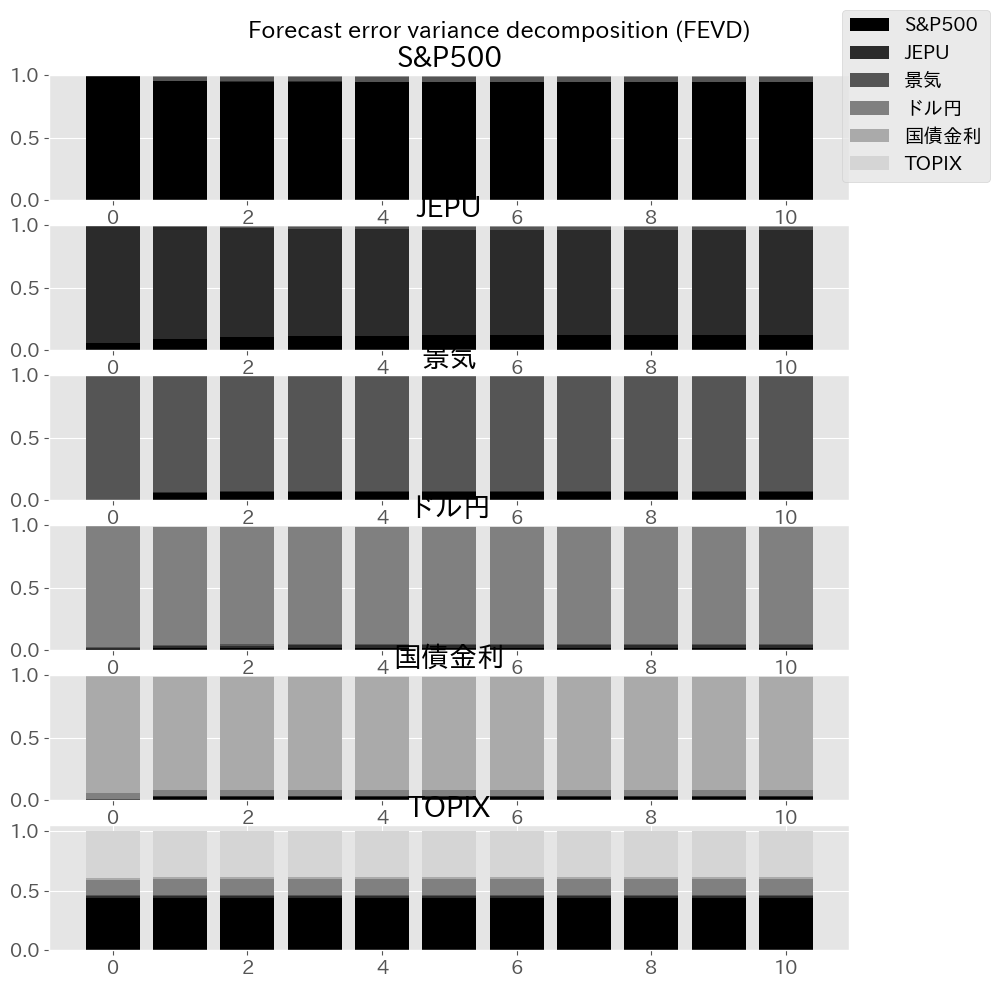

In [117]:
fevd.plot()

### SVARモデル

In [118]:
# #
# # SVARモデルの構築
# #

# #　目的変数の行列Aの定義
# A_0 = np.array([[1,0,0,0,0,0],
#                 ['E',1,0,0,0,0], 
#                 ['E','E',1,0,0,0],
#                 ['E','E','E',1,0,0],
#                 ['E','E','E','E', 1,0],
#                 ['E','E','E','E','E',1]])

# # モデルのインスタンス生成
# SVAR_model = SVAR(df_changed, svar_type='A', A=A_0)

# # 学習
# results_SVAR = SVAR_model.fit(maxlags=3)

# #　推定結果（目的変数の行列A）
# results_SVAR.A

## 短期間の分析

### リーマンショックと世界金融危機

In [119]:
df1 = df_selected.loc['2007-01-31':'2010-12-31',:]
df1

,S&P500,JEPU,景気,ドル円,国債金利,TOPIX
Date,,,,,,
2007-01-31,0.013961,73.933741,0.000802,0.022691,0.026,0.017403
2007-02-28,-0.022088,71.741044,-0.001605,-0.026650,-0.060,0.018292
2007-03-31,0.009930,79.444181,-0.004024,-0.007030,0.011,-0.019965
2007-04-30,0.042380,75.665102,0.006431,0.016439,-0.024,-0.009212
2007-05-31,0.032031,68.545354,0.007981,0.016749,0.120,0.034577
2007-06-30,-0.017977,66.451433,-0.004781,0.013151,0.115,0.007253
2007-07-31,-0.032505,86.406139,-0.008825,-0.035349,-0.065,-0.045169
2007-08-31,0.012782,95.720644,0.013606,-0.023390,-0.185,-0.056111
2007-09-30,0.035168,86.136044,-0.016026,-0.009946,0.063,0.005323


In [120]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
GFC = VAR(df1)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(5).summary())

# 最適なラグの探索
#lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_GFC = GFC.fit(lag['bic'])

# 結果出力
print(results_VAR.summary())

最適なラグ： 1 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jan, 2024
Time:                     05:59:37
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -26.7421
Nobs:                     238.000    HQIC:                  -27.1079
Log likelihood:           1270.98    FPE:                1.31821e-12
AIC:                     -27.3548    Det(Omega_mle):     1.10777e-12
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.004864         0.009906           -0.491           0.623
L1.S&P500        -0.063339         0.091093           -0.695           0.487
L1.JEPU           0.000103         0.000088            1.163    

In [121]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df1.columns)):
    for j in range(len(df1.columns)):
        if i != j :
            #因果の検定
            test_c_GFC = results_GFC.test_causality(causing=i, caused=j) 
            #p値
            test_c_GFC.pvalue
            #検定結果の出力
            print(df1.columns[i],'->',df1.columns[j],'\t',test_c_GFC.pvalue)

S&P500 -> JEPU 	 0.7946280953948238
S&P500 -> 景気 	 0.11378285773289619
S&P500 -> ドル円 	 0.10874231924141008
S&P500 -> 国債金利 	 0.021290661728960898
S&P500 -> TOPIX 	 0.2066181845223207
JEPU -> S&P500 	 0.3334728883558915
JEPU -> 景気 	 0.9998535926307978
JEPU -> ドル円 	 0.2815067249381041
JEPU -> 国債金利 	 0.48868157695190295
JEPU -> TOPIX 	 0.311129916790867
景気 -> S&P500 	 0.07657681065912757
景気 -> JEPU 	 0.4619338489145064
景気 -> ドル円 	 0.04539534108027653
景気 -> 国債金利 	 0.28392496266993644
景気 -> TOPIX 	 0.9882855966405141
ドル円 -> S&P500 	 0.3263085708411798
ドル円 -> JEPU 	 0.9451787746382662
ドル円 -> 景気 	 0.05516363792353381
ドル円 -> 国債金利 	 0.6347663924808633
ドル円 -> TOPIX 	 0.7893351400683443
国債金利 -> S&P500 	 0.22230381201441782
国債金利 -> JEPU 	 0.6450056083562665
国債金利 -> 景気 	 0.8941474555865595
国債金利 -> ドル円 	 0.45921519134899436
国債金利 -> TOPIX 	 0.6852556102622223
TOPIX -> S&P500 	 0.45567709954919355
TOPIX -> JEPU 	 0.528757201334735
TOPIX -> 景気 	 0.17921840663638997
TOPIX -> ドル円 	 0.34891553731216096
TOP

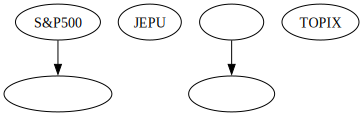

In [122]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph1 = Digraph()

# グラフにノードを追加
for i in range(len(df1.columns)):
    graph1.node(df1.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df1.columns)):
    for j in range(len(df1.columns)):
        if i != j :
            #因果の検定
            test_c_GFC = results_GFC.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_GFC.pvalue < 0.05:
                graph1.edge(df1.columns[i], df1.columns[j])

# 有向グラフを表示
graph1

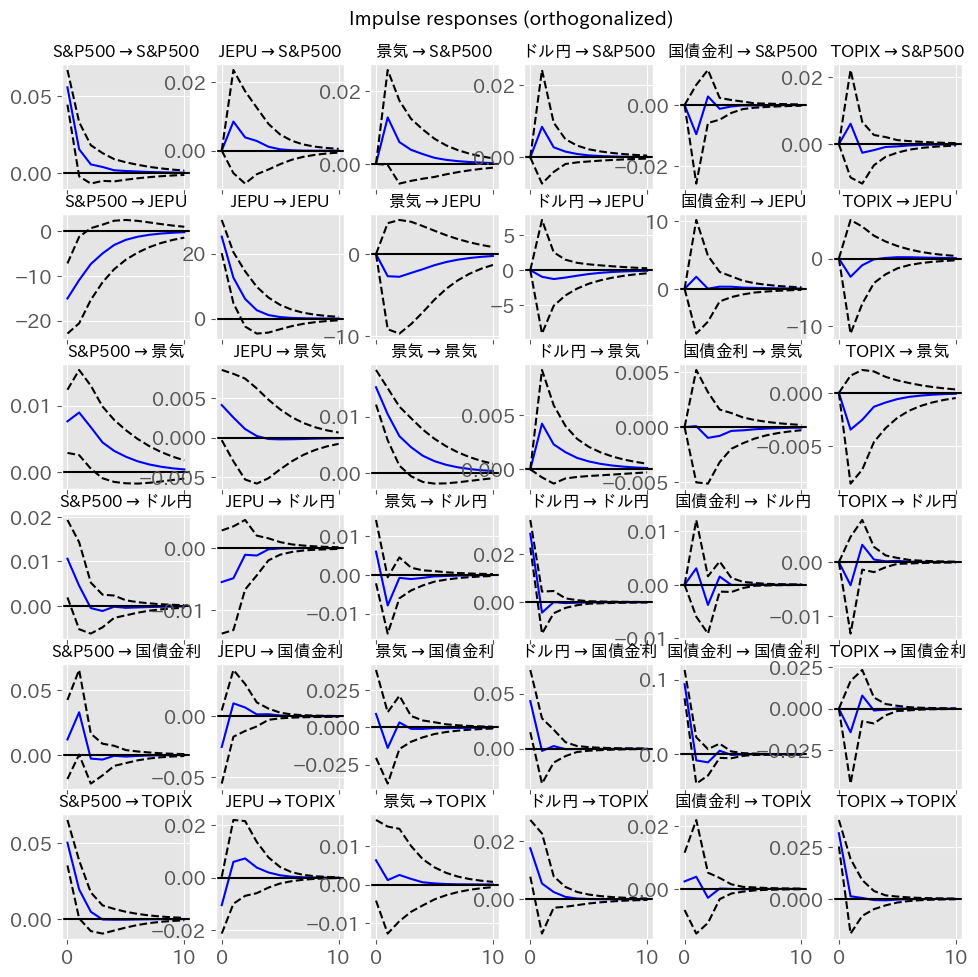

In [123]:
#インパルス応答関数
    
irf_GFC = results_GFC.irf()
irf_GFC.plot(orth=True)
plt.show()

In [124]:
fevd_GFC = results_GFC.fevd(11)
fevd_GFC.summary()

FEVD for S&P500
        S&P500      JEPU        景気       ドル円      国債金利     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1     0.885590  0.018757  0.043059  0.018700  0.024139  0.009756
2     0.870044  0.022012  0.051119  0.020187  0.025471  0.011167
3     0.863968  0.023738  0.054296  0.020596  0.025570  0.011832
4     0.861835  0.023969  0.055942  0.020748  0.025541  0.011966
5     0.861110  0.023967  0.056560  0.020797  0.025509  0.012058
6     0.860814  0.023953  0.056831  0.020818  0.025499  0.012085
7     0.860685  0.023945  0.056954  0.020828  0.025494  0.012094
8     0.860627  0.023942  0.057010  0.020832  0.025491  0.012097
9     0.860600  0.023941  0.057037  0.020834  0.025490  0.012099
10    0.860587  0.023940  0.057049  0.020835  0.025489  0.012099

FEVD for JEPU
        S&P500      JEPU        景気       ドル円      国債金利     TOPIX
0     0.262937  0.737063  0.000000  0.000000  0.000000  0.000000
1     0.299059  0.684827  0.006319  0.000753  0.002748  0.0

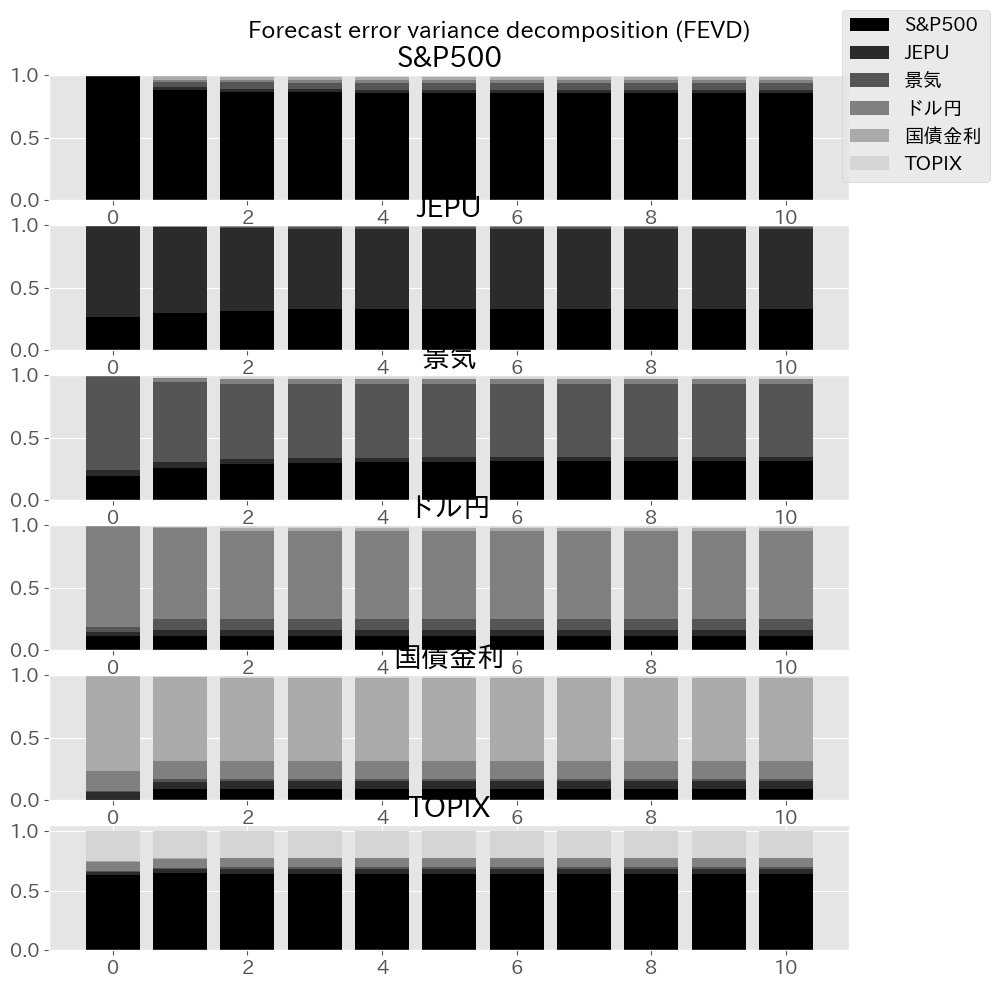

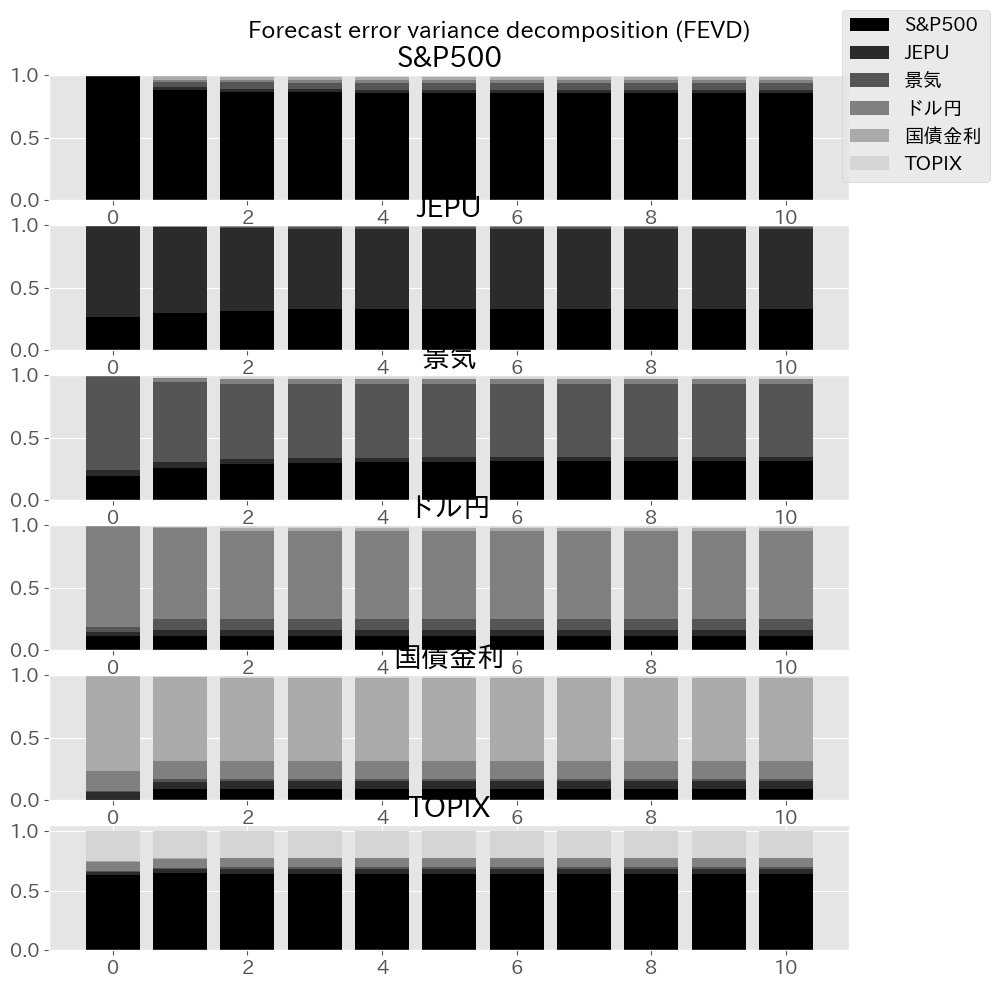

In [125]:
fevd_GFC.plot()

In [126]:
df2 = df_selected.loc['2020-01-31':'2023-05-06',:]
df2

,S&P500,JEPU,景気,ドル円,国債金利,TOPIX
Date,,,,,,
2020-01-31,-0.001629,105.157640,-0.007168,-0.000825,-0.046,-0.023178
2020-02-29,-0.087860,114.718233,-0.015406,0.003388,-0.092,-0.109137
2020-03-31,-0.133668,202.672243,-0.028719,-0.006419,0.184,-0.069739
2020-04-30,0.119421,175.269844,-0.118606,-0.019696,-0.067,0.044919
2020-05-31,0.044286,213.064328,-0.080396,0.005241,0.045,0.073866
2020-06-30,0.018221,155.603417,0.038250,0.005399,0.033,-0.000966
2020-07-31,0.053637,137.536289,0.042146,-0.029870,-0.024,-0.033897
2020-08-31,0.067719,126.444168,0.016789,0.007813,0.038,0.066231
2020-09-30,-0.040018,121.080860,0.029731,0.003978,-0.029,0.007317


In [127]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
var_COVID = VAR(df2)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(5).summary())

# 最適なラグの探索
lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_COVID = var_COVID.fit(lag['bic'])

# 結果出力
print(results_COVID.summary())

最適なラグ： 1 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jan, 2024
Time:                     05:59:45
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -25.0455
Nobs:                     39.0000    HQIC:                  -26.1942
Log likelihood:           233.290    FPE:                2.26502e-12
AIC:                     -26.8370    Det(Omega_mle):     8.41227e-13
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.059068         0.044205           -1.336           0.181
L1.S&P500        -0.157789         0.340005           -0.464           0.643
L1.JEPU           0.000564         0.000377            1.497    

In [128]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        if i != j :
            #因果の検定
            test_c_COVID = results_COVID.test_causality(causing=i, caused=j) 
            #p値
            test_c_COVID.pvalue
            #検定結果の出力
            print(df2.columns[i],'->',df2.columns[j],'\t',test_c_COVID.pvalue)

S&P500 -> JEPU 	 0.1355921130371316
S&P500 -> 景気 	 0.8783749058393174
S&P500 -> ドル円 	 0.4822478267238083
S&P500 -> 国債金利 	 0.46252914766399456
S&P500 -> TOPIX 	 0.8967724442605788
JEPU -> S&P500 	 0.1359311956620259
JEPU -> 景気 	 0.7718621987949043
JEPU -> ドル円 	 0.09425134789971927
JEPU -> 国債金利 	 0.45746984172933913
JEPU -> TOPIX 	 0.6019004137204875
景気 -> S&P500 	 0.2886315233598721
景気 -> JEPU 	 0.0023583195146519168
景気 -> ドル円 	 0.20845967372511126
景気 -> 国債金利 	 0.283594936615665
景気 -> TOPIX 	 0.98638466329727
ドル円 -> S&P500 	 0.8876714347090103
ドル円 -> JEPU 	 0.16348308333142816
ドル円 -> 景気 	 0.7615777548664832
ドル円 -> 国債金利 	 0.016394226117557666
ドル円 -> TOPIX 	 0.7742720812459856
国債金利 -> S&P500 	 0.48890079246864426
国債金利 -> JEPU 	 0.0011527065315109003
国債金利 -> 景気 	 0.8213114099313478
国債金利 -> ドル円 	 0.3107335251106255
国債金利 -> TOPIX 	 0.45266630316059886
TOPIX -> S&P500 	 0.7632860969093027
TOPIX -> JEPU 	 0.6093674669538314
TOPIX -> 景気 	 0.02625973878718353
TOPIX -> ドル円 	 0.7194167933776419
TO

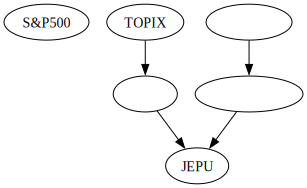

In [129]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph2 = Digraph()

# グラフにノードを追加
for i in range(len(df2.columns)):
    graph2.node(df2.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        if i != j :
            #因果の検定
            test_c_COVID = results_COVID.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_COVID.pvalue < 0.05:
                graph2.edge(df2.columns[i], df2.columns[j])

# 有向グラフを表示
graph2

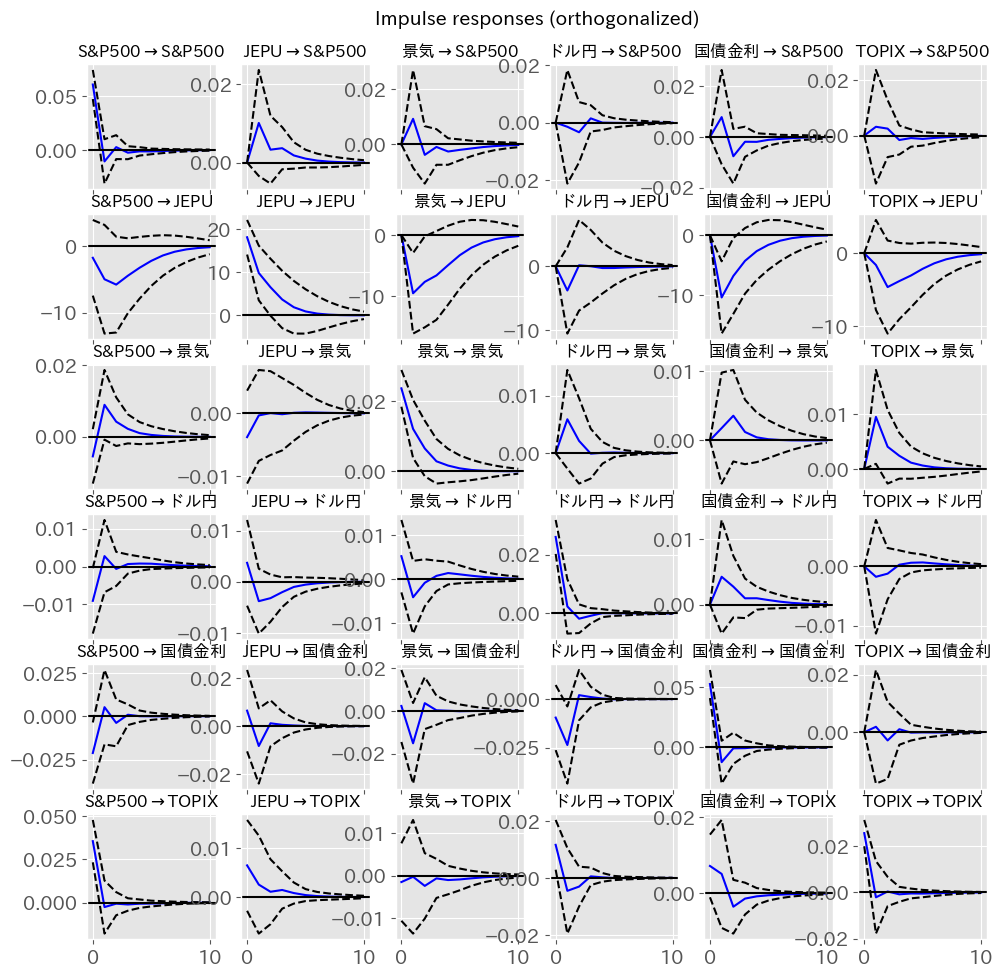

In [130]:
#インパルス応答関数
    
irf_COVID = results_COVID.irf()
irf_COVID.plot(orth=True)
plt.show()

In [131]:
fevd_COVID = results_COVID.fevd(11)
fevd_COVID.summary()

FEVD for S&P500
        S&P500      JEPU        景気       ドル円      国債金利     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1     0.935900  0.025033  0.021074  0.000514  0.015016  0.002463
2     0.913587  0.026968  0.023917  0.003193  0.028442  0.003893
3     0.908807  0.029970  0.023944  0.003688  0.029092  0.004499
4     0.905762  0.030633  0.025390  0.003674  0.029859  0.004682
5     0.904174  0.030800  0.026229  0.003667  0.030100  0.005030
6     0.903410  0.030826  0.026685  0.003667  0.030207  0.005206
7     0.903096  0.030826  0.026878  0.003666  0.030241  0.005292
8     0.902980  0.030823  0.026952  0.003666  0.030251  0.005327
9     0.902941  0.030822  0.026978  0.003666  0.030253  0.005340
10    0.902929  0.030821  0.026986  0.003666  0.030254  0.005344

FEVD for JEPU
        S&P500      JEPU        景気       ドル円      国債金利     TOPIX
0     0.008833  0.991167  0.000000  0.000000  0.000000  0.000000
1     0.041092  0.637399  0.136102  0.021620  0.159904  0.0

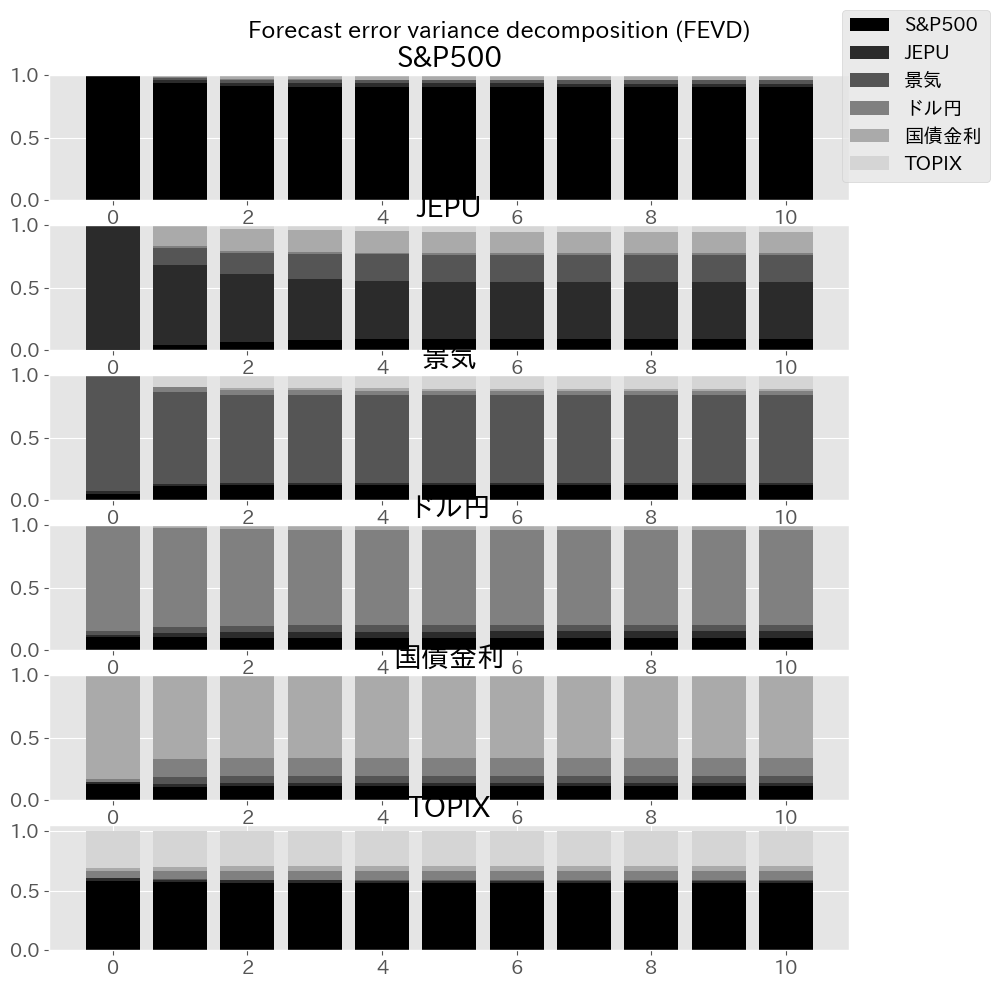

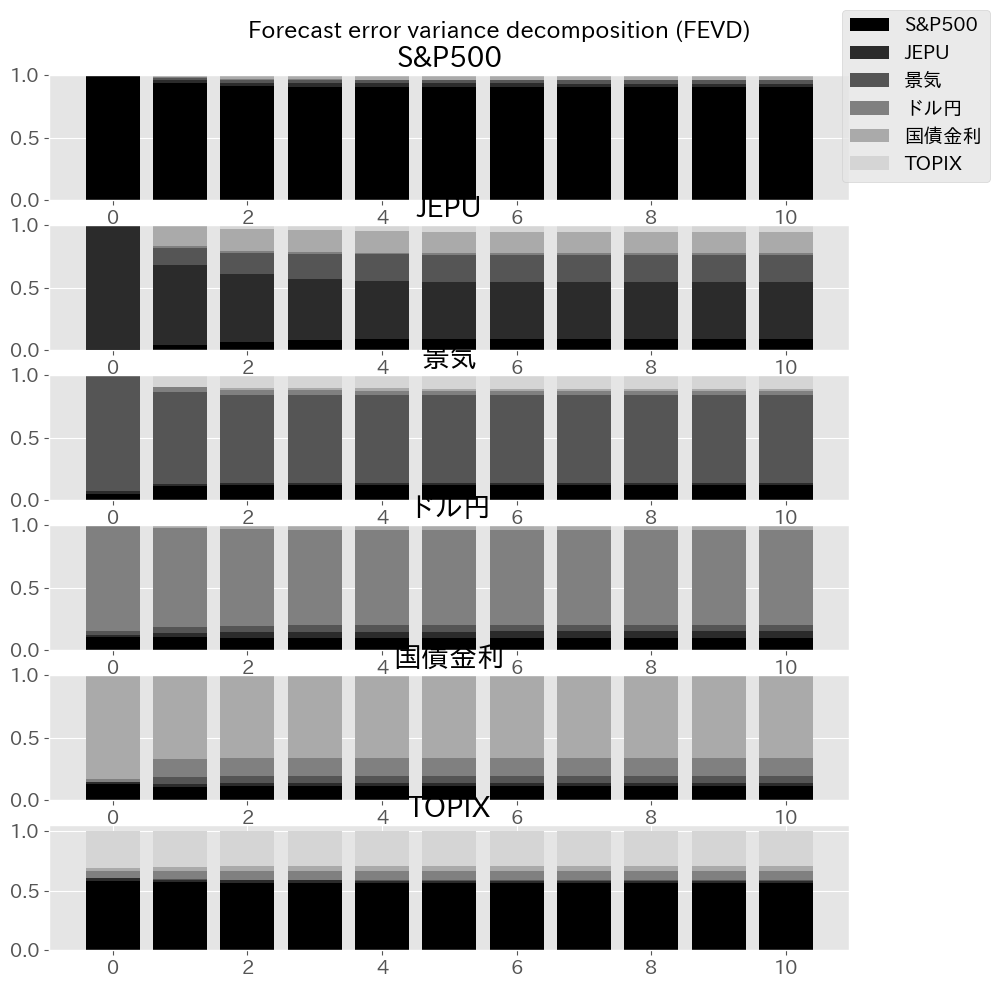

In [132]:
fevd_COVID.plot()